# The Three Body Problem

## Safwan Ahmed 22006797

In this notebook, we will simulate two bodies orbiting their centre of mass using the Euler and Velocity Verlet methods. We will use equations from simple classical mechanics to solve them and plot our orbits using three popular integrating methods. We will also determine the initial conditions required for two bodies to rotate around their centre of mass in the first place. 

Later, we will expand our problem to three bodies using the same integration techniques and will explore some specific initial conditions that lead to interesting orbits. We will also push our integration methods to see how accurately they work with many bodies, in our case up to 100. 

In [1]:
# Import relavent libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 


## Simple tests: Euler's Method

In this section, we will be using the Euler method to integrate the gravitational field strength equation to find both velocity and acceleration at different timesteps. Euler's method is defined by the equation$^{1}$:

$$ y(t + \Delta t) = y(t) + \Delta t \frac{dy}{dt} \tag{1}$$ 

It serves as an approximation to integrating a differential equation analytically. As $\Delta x$ tends towards 0, this method becomes even more accurate.  

The force on an object, m1, due to gravity is given by:

$$ \mathbf{F_1} = \frac{G m_1 m_2}{|r_{12}^{3}|} \mathbf{r_{12}}  \tag{2}  $$

where $m_1$ is the mass of the object, $m_2$ is the mass of the object it's orbiting, and $r_{12}$ is the distance between the centres of the 2 objects and G is gravitational field strength$^{2}$. We can equate (2) to the equation for circular motion: 

$$   F_1 = \frac{m_1v_1^2}{r_1} \tag{3}  $$

which after rearranging for velocity, we get the equation for an object in orbit due to gravity:

$$ v_1 = \sqrt{\frac{G m_{2}}{r_{1}}} \tag{4} $$

$m_2$ and $r_1$ are both equal to 1 in our scenario so the velocity will be 1. We will choose the starting velocity to be in the positive y-direction, allowing the object to go anticlockwise. We will also set G=1(here and in the rest of the notebook) for simplicity. This does mean our simulations would be similar but not accurate to real life (gravity will be much stronger in our simulations). 

In [5]:
def force(r1,r2,m1,m2):
    """Gives the force acting on a specficied object with a mass of m1, at a specified position, r1, around a larger fixed 
    object of mass m2 at a position r2. G is set to 1. 
    Input: mass of object 1, mass of object 2, position of object 1 as a 2-entry array, position of object 2 as a 2-entry array  
    Output: Force on object 1
    """
    # Find r_12 and its magnitude
    r_12 = np.array(r2) - np.array(r1)
    r = (r_12[0]**2 + r_12[1]**2) ** 0.5 
    f_on_m1 =  (m1 * m2 / r ** 3) * r_12
    return f_on_m1

In [6]:
# Set up parameters
Ndim = 2     #2D problem for now
Nsteps = 5000
dt = 0.01
m1 = 0.0001  # small
m2 = 1.0     # Large
r1 = np.zeros((Nsteps,Ndim))
r2 = np.zeros((Nsteps,Ndim))
v1 = np.zeros((Nsteps,Ndim))
v2 = np.zeros((Nsteps,Ndim))
# Initial conditions
r1[0] = np.array((1,0)) # start at (1,0)
v1[0] = np.array((0, 1)) # velocity is tangential in positive y direction
# Set up storage for energies
KE = np.array([0.5 * m1 * ((v1[0][0] ** 2 + v1[0][1] ** 2)**0.5) ** 2])
PE = np.array([-m1 * m2 / (r1[0][0] ** 2 + r1[0][1] ** 2) ** 0.5])
# don't need to set position or velocity of larger mass since they're both already zero 

In [7]:
%%time
for i in range(Nsteps-1): # We calculate r, v at i+1 at each iteration
    f1 = force(r1[i], r2[i], m1, m2)
    v1[i+1] = v1[i] + dt * f1 / m1 
    r1[i+1] = r1[i] + dt * v1[i]
    KE = np.append(KE, (0.5 * m1 * ((v1[i+1][0] ** 2 + v1[i+1][1] ** 2)**0.5) ** 2)) # calculate energies 
    PE = np.append(PE, -m1 * m2 / (r1[i+1][0] ** 2 + r1[i+1][1] ** 2)**0.5)

CPU times: total: 172 ms
Wall time: 162 ms


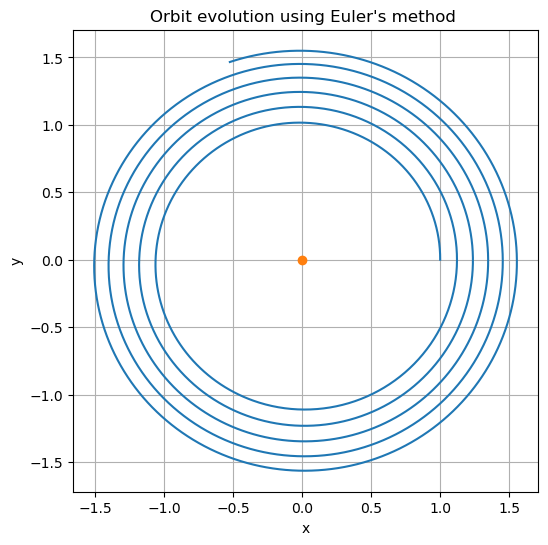

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(r1[:,0], r1[:,1]) # plot results
plt.plot(0,0,marker = 'o')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit evolution using Euler\'s method ');

We can calculate the kinetic and potential energy using the following formulas:

$$ E_{KE} = \frac{1}{2} m_1 v_1^2 \tag{5} $$
and
$$ E_P = \frac{G m_1 m_2 }{r_{12}} \tag{6} $$

where $m_1$ and $v_2$ is the mass and velocity of the orbiting body, $m_2$ is the mass of the body being orbited, and $r_{12}$ is distance between two bodies. 

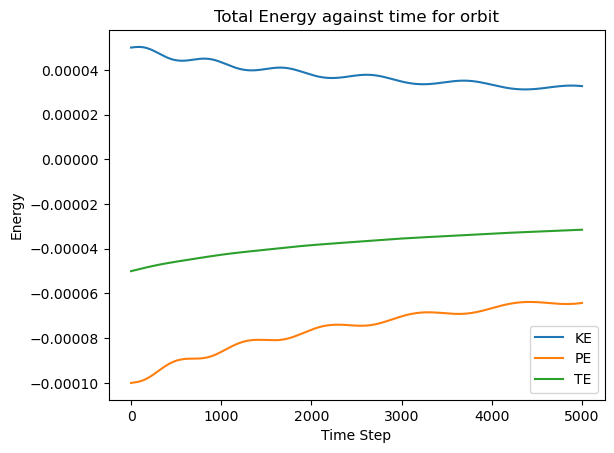

In [9]:
TE = KE + PE # Find total energy
plt.plot(KE, label = 'KE')
plt.plot(PE, label = 'PE')
plt.plot(TE, label = 'TE')
plt.xlabel('Time Step')
plt.ylabel('Energy')
plt.title('Total Energy against time for orbit')
plt.legend();

In [7]:
e_change = 100 * (TE[-1] - TE[0]) / TE[0]
print(f'Energy gained as a percentage was {e_change}%')

Energy gained as a percentage was -37.05455742192256%


Angular momentum is given by:
$$ L = mvr \tag{7} $$
where $m$ is the mass of the orbiting body, $v$ is velocity and $r$ is radius.  

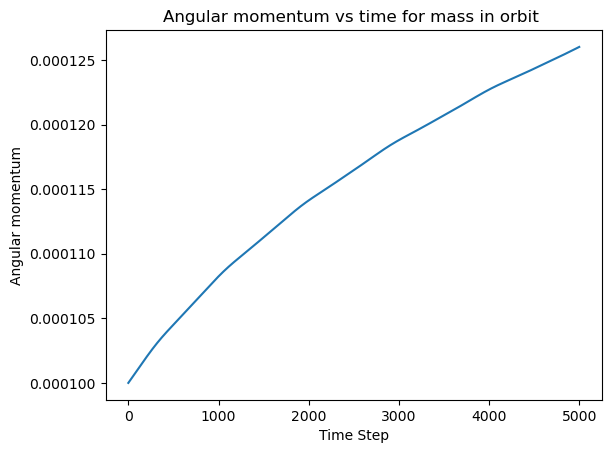

In [8]:
L = m1 * np.sqrt(v1[:,0] ** 2 + v1[:,1] ** 2) * np.sqrt(r1[:,0] ** 2 + r1[:,1] ** 2) # Find angular momentum for all points
plt.plot(L)
plt.xlabel('Time Step')
plt.ylabel('Angular momentum')
plt.title("Angular momentum vs time for mass in orbit ");

In [9]:
l_change = 100 * (L[-1] - L[0]) / L[0]
print(f'Angular momentum gained as a percentage was {l_change}%')

Angular momentum gained as a percentage was 26.0178424591447%


The motion plot resembles circular motion, however, it is not perfect. As we decrease the timestep, however, the orbit becomes closer to a circle. The total energy graph should have been a straight horizontal line but due to the inaccuracy of Euler's method, it's just about similiar. This shows Euler's method isn't very accurate for orbital plots like above. Decreasing timestep increases accuracy but this can result in a very expensive computation for reasonable approximations, hence why it's not the most efficient method.   

##  velocity Verlet Method

The velocity Verlet method serves as a more accurate method to integrate the gravitational field equation. It is both energy-conserving and time-reversible. Its error is proportional to $dt^2$, making this method overall very favourable in our aim to simulate orbits. It's given by the two equations$^{3}$: 

$$ x(t + \Delta t) = x(t) + \Delta t v(t) + \Delta t^2 \frac{F(t)}{2 m} \tag{8} $$

$$ v(t + \Delta t) = v(t) + \Delta t \frac{F(t) + F(t + \Delta t)}{2 m}. \tag{9} $$

The use of the force at the next time step is why it's particularly unique yet so accurate. 


To find the initial positions and velocities, we will equate and rearrange (2) and (3) to give us:

$$ v_1 = \sqrt{G m_2 r_1} \tag{10} $$

where we conveniently chose $r_{12}$ to be 1. We will choose our masses to be 1 and 3 and lie on the x-axis at -0.75 and 0.25 respectively, allowing our centre of mass to lie on the origin. This means we will have a starting velocity of 1.5 and 0.5 respectively after substituting into (10). For the bodies to then orbit each other, we will choose the velocities to be in opposite directions to each other and perpendicular to the x-axis. 

In [10]:
# Set up number of steps, masses, timestep 
Nsteps_vv = 15000
dt_vv = 0.01
m1_vv, m2_vv = 1,3  # similiar masses
# Storage for positions, velocities etc 
r1_vv = np.zeros((Nsteps_vv,Ndim))
r2_vv = np.zeros((Nsteps_vv,Ndim))
v1_vv = np.zeros((Nsteps_vv,Ndim))
v2_vv = np.zeros((Nsteps_vv,Ndim))
# Initial conditions
r1_vv[0], r2_vv[0] = np.array((-0.75,0)), np.array((0.25,0)) 
v1_vv[0], v2_vv[0] = np.array((0,1.5)) , np.array((0,-0.5))
# Set up storage for energies
KE_vv1 = np.array([0.5 * m1_vv * ((v1_vv[0][0] ** 2 + v1_vv[0][1] ** 2)**0.5) ** 2])
KE_vv2 = np.array([0.5 * m2_vv * ((v2_vv[0][0] ** 2 + v2_vv[0][1] ** 2)**0.5) ** 2])
PE_vv1 = np.array([- m1_vv * m2_vv / (r1_vv[0][0] ** 2 + r1_vv[0][1] ** 2) ** 0.5])
PE_vv2 = np.array([- m2_vv * m1_vv / (r2_vv[0][0] ** 2 + r2_vv[0][1] ** 2) ** 0.5])

In [11]:
%%time
for i in range(Nsteps_vv-1):
    # Find forces on masses at this timestep
    f1_vv = force(r1_vv[i], r2_vv[i], m1_vv, m2_vv)
    f2_vv = force(r2_vv[i], r1_vv[i], m2_vv, m1_vv)
    # Update positions using velocity Verlet
    r1_vv[i+1] = r1_vv[i] + dt_vv * v1_vv[i] + (dt_vv**2) * f1_vv/ (2 * m1_vv)
    r2_vv[i+1] = r2_vv[i] + dt_vv * v2_vv[i] + (dt_vv**2) * f2_vv/ (2 * m2_vv)
    # Find forces at new timestep 
    f1new = force(r1_vv[i+1], r2_vv[i+1], m1_vv, m2_vv)
    f2new = force(r2_vv[i+1], r1_vv[i+1], m2_vv, m1_vv)
    # Update velocities using velocity Verlet
    v1_vv[i+1] = v1_vv[i] + (dt_vv * (f1_vv + f1new) / (2*m1_vv))
    v2_vv[i+1] = v2_vv[i] + (dt_vv * (f2_vv + f2new) / (2*m2_vv))
    # Store energies
    KE_vv1 = np.append(KE_vv1, (0.5 * m1_vv * ((v1_vv[i+1][0] ** 2 + v1_vv[i+1][1] ** 2)**0.5) ** 2)) 
    KE_vv2 = np.append(KE_vv2, (0.5 * m2_vv * ((v2_vv[i+1][0] ** 2 + v2_vv[i+1][1] ** 2)**0.5) ** 2)) 
    PE_vv1 = np.append(PE_vv1, -m1_vv * m2_vv / (r1_vv[i+1][0] ** 2 + r1_vv[i+1][1] ** 2)**0.5)
    PE_vv2 = np.append(PE_vv2, -m2_vv * m1_vv / (r2_vv[i+1][0] ** 2 + r2_vv[i+1][1] ** 2)**0.5)

CPU times: total: 1.31 s
Wall time: 1.32 s


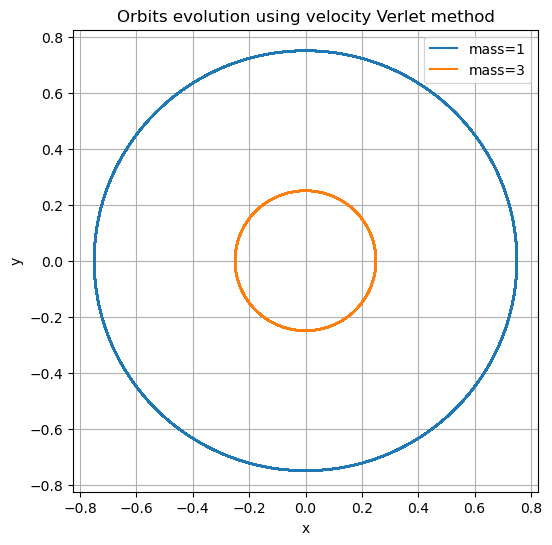

In [12]:
plt.figure(figsize=(6, 6)) # Plot trajectory
plt.plot(r1_vv[:,0], r1_vv[:,1], label = 'mass=1')
plt.plot(r2_vv[:,0], r2_vv[:,1], label='mass=3')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits evolution using velocity Verlet method')
plt.legend();

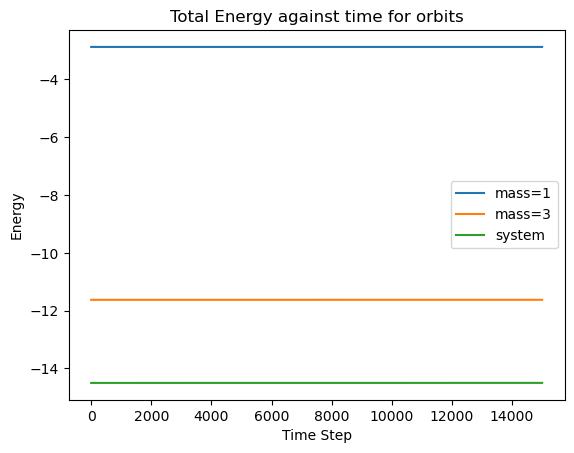

In [13]:
TE_vv1 = KE_vv1 + PE_vv1 # Find total energy
TE_vv2 = KE_vv2 + PE_vv2
TE_vvsystem = TE_vv1 + TE_vv2
plt.plot(TE_vv1, label = 'mass=1')
plt.plot(TE_vv2, label = 'mass=3')
plt.plot(TE_vvsystem, label = 'system')
plt.xlabel('Time Step')
plt.ylabel('Energy')
plt.title('Total Energy against time for orbits')
plt.legend();

In [14]:
e_change = 100 * (TE_vvsystem[-1] - TE_vvsystem[0]) / TE_vvsystem[0]
print(f'Energy gained as a percentage was {e_change}%')

Energy gained as a percentage was -0.00943161418836451%


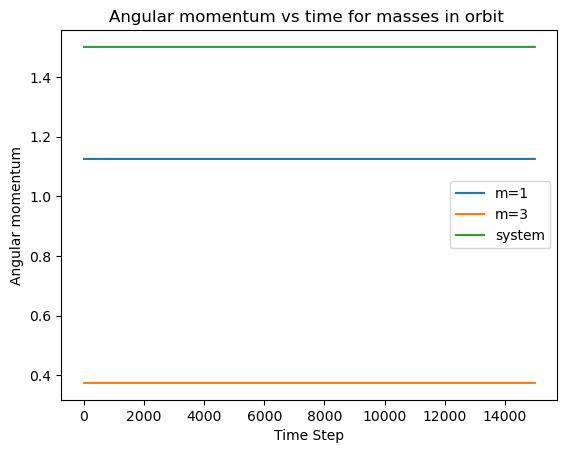

In [15]:
L_vv1 = m1_vv * np.sqrt(v1_vv[:,0] ** 2 + v1_vv[:,1] ** 2) * np.sqrt(r1_vv[:,0] ** 2 + r1_vv[:,1] ** 2)
L_vv2 = m2_vv * np.sqrt(v2_vv[:,0] ** 2 + v2_vv[:,1] ** 2) * np.sqrt(r2_vv[:,0] ** 2 + r2_vv[:,1] ** 2)
L_vvsystem = L_vv1 + L_vv2
plt.plot(L_vv1, label='m=1')
plt.plot(L_vv2, label='m=3')
plt.plot(L_vvsystem, label = 'system')
plt.xlabel('Time Step')
plt.ylabel('Angular momentum')
plt.title("Angular momentum vs time for masses in orbit ")
plt.legend();

In [16]:
l_change = 100 * (L_vvsystem[-1] - L_vvsystem[0]) / L_vvsystem[0]
print(f'Angular momentum gained as a percentage was {l_change}%')

Angular momentum gained as a percentage was 4.987380878655282e-07%


The total energy and angular momentum are preserved almost perfectly for both bodies. Printing out the arrays, we can further confirm this. For the velocity Verlet method, I simulated about 50 full orbits. It's clear from the orbits evolution graph that the velocity Verlet method is far more accurate than Euler's method. Both methods perform better with a smaller timestep, although this of course requires more computational time. 
Both methods take around the same amount of time to execute, but the velocity Verlet method is slightly faster. This means the velocity Verlet method can give more accurate results whilst taking the same amount of time to execute. This is also proven analytically when we realise that its error is proportional to $dt^2$, unlike Euler which is proportional to $dt$.  

## Three body problem - Star, Planet and a Moon

We will now explore a complicated system consisting of a star, planet and moon. The star will be significantly heavier than the planet and moon, whilst the moon will be about 100 times lighter than the planet. This means the centre of mass can be assumed to be where the star will be located. The planet and moon will also be very far from the star compared to how close they are to each other. 

For our initial conditions, we will set all planets to be on the x-axis with the star at the origin, the planet on the right and the moon even further. The distance between the moon and planet, $r_{23}$ will be 400 times smaller than between the star and planet, $r_{12}$. 

For our initial velocities, we will set our star to be stationary since the gravity of the moon and planet make virtually no difference. The planet's velocity will be determined by (4) where $m_2$ will be the star and we assume the moon has a negligible difference to the planet's net force. Finally, we calculate the moon's velocity with respect to the planet and then add the velocity of the planet to it. This in turn takes into account how the moon is orbiting an object which itself is moving. 

In [17]:
m1_3b, m2_3b, m3_3b = 1, 3 * 10 ** -6, 3.6 * 10 ** -8 # set initial masses
r_12, r_23 = 1, 0.0025
r1_3b_0, r2_3b_0, r3_3b_0 = np.array([0,0]), np.array([r_12, 0]), np.array([r_12 + r_23, 0]) # set initial positions
v1_3b_0, v2_3b_0 = np.array([0,0]), np.array([0,np.sqrt(m1_3b / r_12)])
v3_3b_0 = np.array([0, np.sqrt(m2_3b / r_23)]) + v2_3b_0 # add velocities

In [18]:
# Set up for 3 bodies and 2 orbits 
Nsteps_3b = 15000
dt_3b = 0.01
# storage for positions and velocities
r1_3b = np.zeros((Nsteps_3b,Ndim))
r2_3b = np.zeros((Nsteps_3b,Ndim))
r3_3b = np.zeros((Nsteps_3b,Ndim))
v1_3b = np.zeros((Nsteps_3b,Ndim))
v2_3b = np.zeros((Nsteps_3b,Ndim))
v3_3b = np.zeros((Nsteps_3b,Ndim))
# Initial conditions
r1_3b[0], r2_3b[0], r3_3b[0] = r1_3b_0, r2_3b_0, r3_3b_0 
v1_3b[0], v2_3b[0], v3_3b[0] = v1_3b_0, v2_3b_0, v3_3b_0
#Set up storage for energies
KE_3b2 = np.array([0.5 * m2_3b * ((v2_3b[0][0] ** 2 + v2_3b[0][1] ** 2)**0.5) ** 2])
KE_3b3 = np.array([0.5 * m3_3b * ((v3_3b[0][0] ** 2 + v3_3b[0][1] ** 2)**0.5) ** 2])
PE_3b2 = np.array([-m2_3b * m1_3b / (r2_3b[0][0] ** 2 + r2_3b[0][1] ** 2) ** 0.5])
p1_0 = np.array([-m3_3b * m1_3b / (r3_3b[0][0] ** 2 + r3_3b[0][1] ** 2) ** 0.5]) # potential from star
p2_0 = np.array([-m3_3b * m2_3b / ((r3_3b[0][0] - r2_3b[0][0]) ** 2 + (r3_3b[0][1] - r2_3b[0][1]) ** 2) ** 0.5]) # planet
PE_3b3 = p1_0 + p2_0

In [19]:
%%time
for i in range(Nsteps_3b-1):
    # Find forces on masses at this timestep
    f2_3b = force(r2_3b[i], r1_3b[i], m2_3b, m1_3b)
    f3_3b = force(r3_3b[i], r1_3b[i], m3_3b, m1_3b) + force(r3_3b[i], r2_3b[i], m3_3b, m2_3b) # force from star and planet
    # Update positions using velocity Verlet
    r2_3b[i+1] = r2_3b[i] + dt_3b * v2_3b[i] + (dt_3b**2) * f2_3b/ (2 * m2_3b)
    r3_3b[i+1] = r3_3b[i] + dt_3b * v3_3b[i] + (dt_3b**2) * f3_3b/ (2 * m3_3b)
    # Find forces at new timestep 
    f2new = force(r2_3b[i+1], r1_3b[i+1], m2_3b, m1_3b)
    f3new = force(r3_3b[i+1], r1_3b[i+1], m3_3b, m1_3b) + force(r3_3b[i+1], r2_3b[i+1], m3_3b, m2_3b)
    # Update velocities using velocity Verlet
    v2_3b[i+1] = v2_3b[i] + (dt_3b * (f2_3b + f2new) / (2*m2_3b))
    v3_3b[i+1] = v3_3b[i] + (dt_3b * (f3_3b + f3new) / (2*m3_3b))
    # Store energies
    KE_3b2 = np.append(KE_3b2, (0.5 * m2_3b * ((v2_3b[i+1][0] ** 2 + v2_3b[i+1][1] ** 2)**0.5) ** 2))
    KE_3b3 = np.append(KE_3b3, (0.5 * m3_3b * ((v3_3b[i+1][0] ** 2 + v3_3b[i+1][1] ** 2)**0.5) ** 2))  
    PE_3b2 = np.append(PE_3b2, -m2_3b * m1_3b / (r2_3b[i+1][0] ** 2 + r2_3b[i+1][1] ** 2)**0.5)
    p1 = np.array([-m3_3b * m1_3b / (r3_3b[i+1][0] ** 2 + r3_3b[i+1][1] ** 2)**0.5])
    p2 = np.array([-m3_3b * m2_3b / ((r3_3b[i+1][0]-r2_3b[i+1][0]) ** 2 + (r3_3b[i+1][1]-r2_3b[i+1][1]) ** 2)**0.5])
    PE_3b3 = np.append(PE_3b3, p1 + p2)

CPU times: total: 1.41 s
Wall time: 1.4 s


This a relatively quick computation time considering that our loop is also calculating the kinetic and potential energy at each step. 

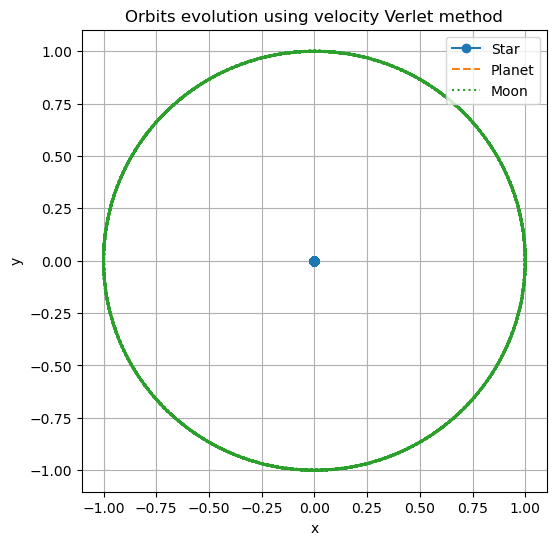

In [20]:
plt.figure(figsize=(6, 6))
plt.plot(r1_3b[:,0], r1_3b[:,1], label = 'Star', linestyle = '-', marker='o')
plt.plot(r2_3b[:,0], r2_3b[:,1], label='Planet', linestyle='--')
plt.plot(r3_3b[:,0], r3_3b[:,1], label='Moon', linestyle=':')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits evolution using velocity Verlet method')
plt.legend();

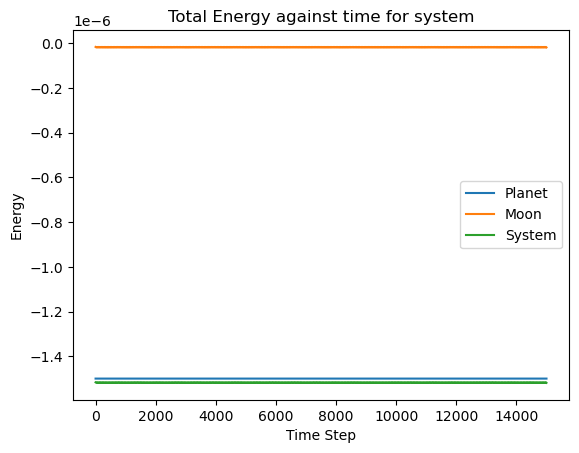

In [21]:
# find total energies
TE_3b2 = KE_3b2 + PE_3b2
TE_3b3 = KE_3b3 + PE_3b3
TE_3b_system = TE_3b2 + TE_3b3
# plot energies
plt.plot(TE_3b2, label = 'Planet')
plt.plot(TE_3b3, label = 'Moon')
plt.plot(TE_3b_system, label = 'System')
plt.xlabel('Time Step')
plt.ylabel('Energy')
plt.title('Total Energy against time for system')
plt.legend();

In [22]:
e_change = 100 * (TE_3b_system[-1] - TE_3b_system[0]) / TE_3b_system[0]
print(f'Energy gained as a percentage was {e_change}%')

Energy gained as a percentage was 0.14055197131004257%


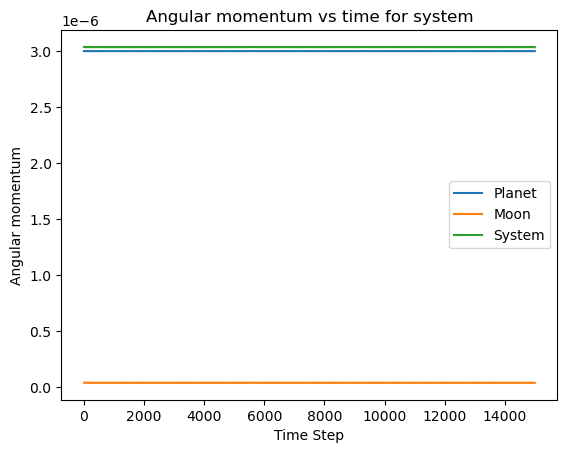

In [23]:
#find angular momentum
L_3b2 = m2_3b * np.sqrt(v2_3b[:,0] ** 2 + v2_3b[:,1] ** 2) * np.sqrt(r2_3b[:,0] ** 2 + r2_3b[:,1] ** 2)
L_3b3 = m3_3b * np.sqrt(v3_3b[:,0] ** 2 + v3_3b[:,1] ** 2) * np.sqrt(r3_3b[:,0] ** 2 + r3_3b[:,1] ** 2)
L_3b_system = L_3b2 + L_3b3
# calculate angular momemtum
plt.plot(L_3b2, label='Planet')
plt.plot(L_3b3, label='Moon')
plt.plot(L_3b_system, label='System')
plt.xlabel('Time Step')
plt.ylabel('Angular momentum')
plt.title("Angular momentum vs time for system")
plt.legend();

In [24]:
l_change = 100 * (L_3b_system[-1] - L_3b_system[0]) / L_3b_system[0]
print(f'Angular momentum gained as a percentage was {l_change}%')

Angular momentum gained as a percentage was -0.06978267494172372%


Energy and angular momentum are conserved almost perfectly. Our graphs above show a straight line even at an accuracy of 10 ^ -6, indicating the accuracy of our orbits. The orbits for the planet are very accurately circular with the star being stationary as we wanted. The moon orbits the planet, but due to the relative distances between star and planet, and planet and moon being 400:1, it's hard to distinguish the orbits. It therefore may be useful to plot the moon and planet during a shorter timeframe to verify that that they do indeed orbit each other. 

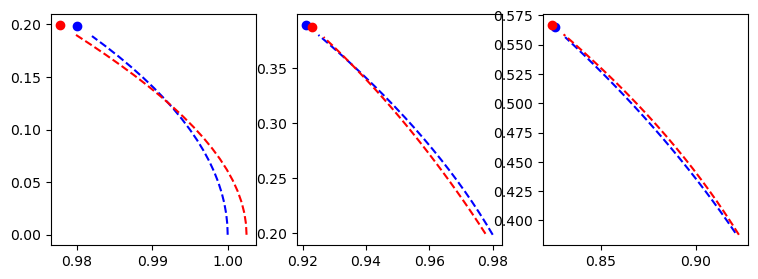

In [25]:
figc = plt.figure(figsize=(9,3)) # dimensions fit to hold 3 square plots
index = 1 # counter to index subplots
interval = 20 # This allows for short enough paths where we can follow each body from picture to picture easily
for i in range(0,interval * 3, interval): # 6 plots
    ax = figc.add_subplot(1,3,index)
    ax.plot(r2_3b[i:i+interval,0], r2_3b[i:i+interval,1], color = 'blue', linestyle = '--')
    ax.plot(r2_3b[i+interval,0], r2_3b[i+interval,1], 'bo')
    ax.plot(r3_3b[i:i+interval,0], r3_3b[i:i+interval,1], color = 'red', linestyle = '--')
    ax.plot(r3_3b[i+interval,0], r3_3b[i+interval,1], 'ro')
    index += 1

We can also plot the absolute distance between the planet and moon. We'll do this for 1000 steps, which equates to about 3 full orbits 

Text(0.5, 1.0, 'Absolute distance between moon and planet against time')

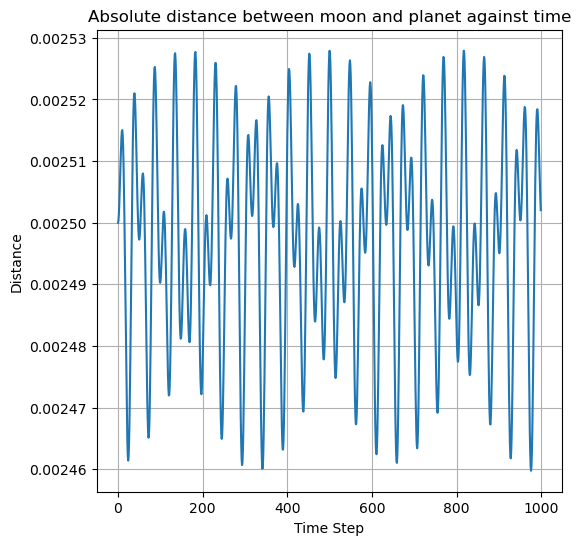

In [26]:
abs_dis = np.sqrt((r2_3b[:,0] - r3_3b[:,0]) ** 2 +  (r2_3b[:,1] - r3_3b[:,1]) ** 2)[:1000]
plt.figure(figsize=(6, 6))
plt.plot(abs_dis)
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Distance')
plt.title('Absolute distance between moon and planet against time')

This graph shows a wave which resembles a superposition of two waves, a carrier wave and a modulating wave. The carrier wave is of a higher frequency which is related to the frequency of how often the moon orbits the planet, while the modulating wave is of a lower frequency which relates to how often the planet orbits the star. 

## Using a more accurate integrator - Runge-Kutta 

In this section, we will try using a more accurate integrator for our orbits. Specifically we will be using the Runge-Kutta equations upto the 4th order, which are as follows$^{4}$: 
$$ y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4) \tag{11} $$
$$ k_1 = \Delta x f( x_n, y_n ) \tag{12} $$
$$ k_2 = \Delta x f( x_n + \Delta x/2, y_n + k_1 / 2) \tag{13} $$
$$ k_3 = \Delta x f( x_n + \Delta x/2, y_n + k_2 / 2) \tag{14} $$
$$ k_4 = \Delta x f( x_n + \Delta x, y_n +k_3 ). \tag{15} $$

Here I decided to adjust my Runge-Kutta function from the notebook I learned it from since I found it easier using my method. It still uses the same formula but I changed the right-hand side function for the Runge-Kutta solver to one which calculated the orbital velocity at each point. The Runge-Kutta function would take this in and project the position using the above equations. 

I also assume here that the star is stationary at the origin which makes our calculations significantly easier. Once again, we can assume this as the star is significantly heavier than the planet and moon. We also carry on our previous assumptions about the planet and moon around each other and the star. 

I will be using the same initial conditions and timestep as previously so that we can compare the orbits fairly and see which method of integration produces the best results.  

In [33]:
# Used PHAS0030 session 4 excercises for inspiration of functions 
def RK4_solver_planet(fun,r0,M,rM,dt,N):
    """Solve orbits equations for an object orbiting another object using fourth-order RK method.
    Inputs:
    fun  velocity for object in orbit due to gravity
    r0   Initial condition - assumed to be two-component
    M    mass of object being orbited 
    rM   position of object being orbited
    dt   Step size
    N    Number of steps
    Returns: Array of positions in 2D of length N+1 
    """
    # Storage for solution
    r = np.zeros((N+1,2))
    # Initial condition
    r[0] = r0
    for i in range(N):
        # RK4 formulae
        k1 = dt*fun(r[i], M, rM)
        k2 = dt*fun(r[i]+0.5*k1, M, rM)
        k3 = dt*fun(r[i]+0.5*k2,M, rM)
        k4 = dt*fun(r[i]+k3, M, rM)
        r[i+1]=r[i]+(k1+2*k2+2*k3+k4)/6
    return r 
def RHS_Gravitional_Orbit(r, M, rM):
    '''
    Gives velocity of a body in order for it to orbit an object of mass M
    Input: position of body as a 2-entry numpy array, Mass of object being orbited, Position of object being orbited
    Output: Velocity as a 2D vector 
    '''
    vector = r - rM # distance from orbiting body to body being orbited 
    perpendicular = np.array([-vector[1], vector[0]]) # transform cordinate to rotate vector pi/2 radians anticlockwise
    magnitude = np.sqrt(vector[0]**2 + vector[1]**2) # magnitude of distance
    return np.sqrt(M / magnitude ** 3) * perpendicular

In [34]:
def RK4_solver_moon(fun,r0,M,rM,P,rP,dt,N):
    """Solve orbits equations for a moon orbiting a planet thats orbiting a star using fourth-order RK method.
    Inputs:
    fun  velocity for object in orbit due to gravity
    r0   Initial condition - assumed to be two-component
    M    mass of star 
    rM   position of star
    P    mass of planet
    rP   position of planet
    dt   Step size
    N    Number of steps
    Returns: Array of positions in 2D of length N+1 
    """
    # Storage for solution
    r = np.zeros((N+1,2))
    # Initial condition
    r[0] = r0
    for i in range(N):
        # RK4 formulae
        k1 = dt*fun(r[i], M, rM) + dt*fun(r[i], P, rP) # consider contributions from star and planet
        k2 = dt*fun(r[i]+0.5*k1, M, rM) + dt*fun(r[i]+0.5*k1, P, rP) 
        k3 = dt*fun(r[i]+0.5*k2,M, rM) + dt*fun(r[i]+0.5*k2,P, rP)
        k4 = dt*fun(r[i]+k3, M, rM) + dt*fun(r[i]+k3, P, rP)
        r[i+1]=r[i]+(k1+2*k2+2*k3+k4)/6
    return r 

In [40]:
# calculate and store orbits
r2_rk4 = RK4_solver_planet(RHS_Gravitional_Orbit, r2_3b_0, m1_3b, r1_3b_0, dt,Nsteps_3b) # planet
r3_rk4 = RK4_solver_moon(RHS_Gravitional_Orbit, r3_3b_0, m1_3b, r1_3b_0, m2_3b, r2_3b_0, dt,Nsteps_3b) # moon

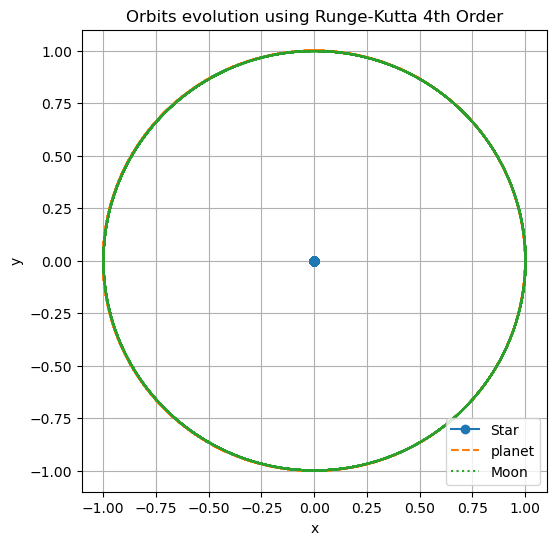

In [36]:
# Plot orbits and make them easy to distinguish
fig = plt.figure(figsize=(6, 6))
plt.plot(r1_3b[:,0], r1_3b[:,1], label = 'Star', linestyle = '-', marker='o') 
plt.plot(r2_rk4[:,0], r2_rk4[:,1], label = 'planet', linestyle = '--')
plt.plot(r3_rk4[:,0], r3_rk4[:,1], label = 'Moon', linestyle = ':') 
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits evolution using Runge-Kutta 4th Order')
plt.legend();

As we can see, the orbit is exactly as how expected it to look with no visible deformities. As Runge-Kutta 4th order is a higher order than the velocity Verlet method which is 2nd order, we can say with confidence it's more accurate. Although Runge-Kutta comes with its drawbacks including lack of time-reversibility. 

We can also calculate and plot our total energies and angular momentum against the time below to see how well they are conserved. Since the star is stationary, we know its energy and angular momentum is zero so we don't need to plot it. 

In [41]:
Nvalues = len(r2_rk4)
KE_2_RK4 = np.zeros(Nvalues) # create storage arrays for KE, PE and L
KE_3_RK4 = np.zeros(Nvalues) 
PE_2_RK4 = np.zeros(Nvalues)
PE_3_RK4 = np.zeros(Nvalues)
L_2_RK4  = np.zeros(Nvalues)
L_3_RK4  = np.zeros(Nvalues)
for i in range(Nvalues):
    v2 = RHS_Gravitional_Orbit(r2_rk4[i], m1_3b, r1_3b_0) # velocity for planet
    v3 = RHS_Gravitional_Orbit(r3_rk4[i], m1_3b, r1_3b_0) + RHS_Gravitional_Orbit(r3_rk4[i], m2_3b, r2_3b_0)# velocity for moon 
    KE_2_RK4[i] = 0.5 * m2_3b * (v2[0] ** 2 + v2[1] ** 2)
    KE_3_RK4[i] = 0.5 * m3_3b * (v3[0] ** 2 + v3[1] ** 2)
    PE_2_RK4[i] = -m2_3b * m1_3b / (r2_rk4[i][0] ** 2 + r2_rk4[i][1] ** 2)**0.5
    prk1 = -m3_3b * m1_3b / (r3_rk4[i][0] ** 2 + r3_rk4[i][1] ** 2)**0.5 
    prk2 = -m3_3b * m1_3b / ((r3_rk4[i][0] - r2_rk4[i][0]) ** 2 + (r3_rk4[i][1] - r2_rk4[i][0]) ** 2)**0.5
    PE_3_RK4[i] = prk1 + prk2 # add gravitational potentials from from star and planet for moon
    L_2_RK4[i] = m2_3b * np.sqrt(v2[0] ** 2 + v2[1] ** 2) * np.sqrt(r2_rk4[i][0] ** 2 + r2_rk4[i][1] ** 2) # planet
    L_3_RK4[i] = m3_3b * np.sqrt(v3[0] ** 2 + v3[1] ** 2) * np.sqrt(r3_rk4[i][0] ** 2 + r3_rk4[i][1] ** 2) # moon
system_rk4_L = L_2_RK4 + L_3_RK4 # total angular momentum of system

In [42]:
TE_2_RK4 = KE_2_RK4 + PE_2_RK4 # total energy 
TE_3_RK4 = KE_3_RK4 + PE_3_RK4
system_rk4_TE = TE_2_RK4 + TE_3_RK4

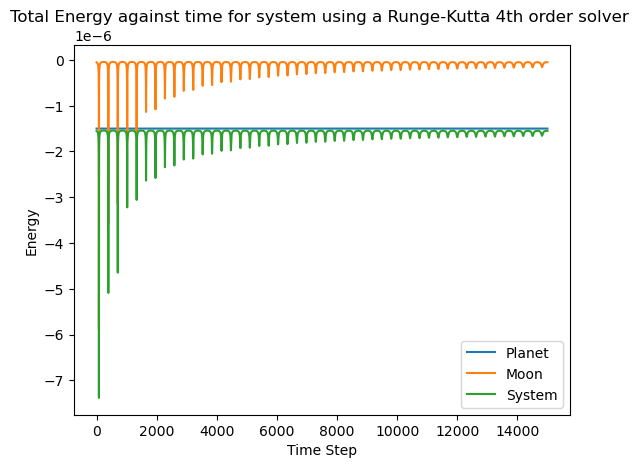

In [43]:
plt.plot(TE_2_RK4, label ='Planet')
plt.plot(TE_3_RK4, label = 'Moon')
plt.plot(system_rk4_TE, label = 'System')
plt.xlabel('Time Step')
plt.ylabel('Energy')
plt.title('Total Energy against time for system using a Runge-Kutta 4th order solver ')
plt.legend();

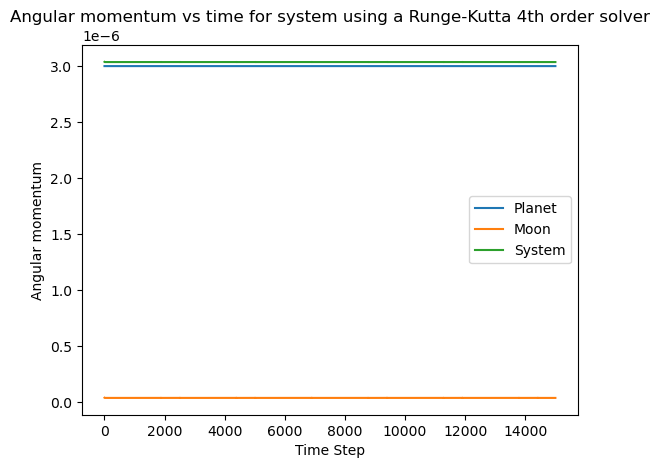

In [44]:
plt.plot(L_2_RK4, label = 'Planet') # Angular momentum
plt.plot(L_3_RK4, label = 'Moon')
plt.plot(system_rk4_L, label = 'System')
plt.xlabel('Time Step')
plt.ylabel('Angular momentum')
plt.title("Angular momentum vs time for system using a Runge-Kutta 4th order solver")
plt.legend();

In [45]:
l_change = 100 * (system_rk4_L[-1] - system_rk4_L[0]) / system_rk4_L[0]
print(f'Angular momentum gained as a percentage was {l_change}%')

Angular momentum gained as a percentage was -0.041684971818189455%


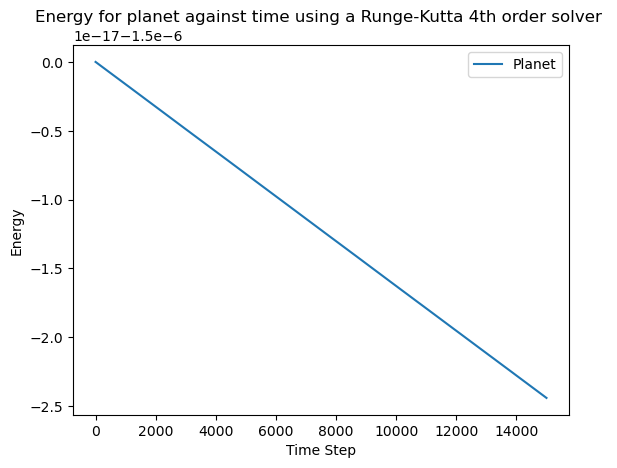

In [46]:
plt.plot(TE_2_RK4, label ='Planet')
plt.xlabel('Time Step')
plt.ylabel('Energy')
plt.title('Energy for planet against time using a Runge-Kutta 4th order solver ')
plt.legend();

Let's compare this to the energy of the same planet using the Verlet Method. 

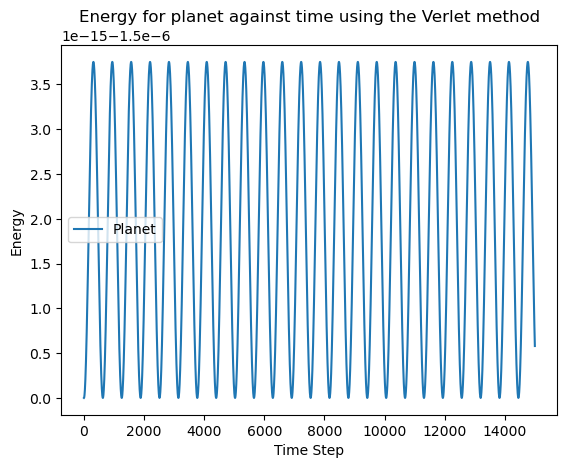

In [47]:
plt.plot(TE_3b2, label ='Planet')
plt.xlabel('Time Step')
plt.ylabel('Energy')
plt.title('Energy for planet against time using the Verlet method')
plt.legend();

Our total energy and angular momentum are conserved almost perfectly. There are imperfections in the energy of the moon. This is likely due to some error within the code (which I couldn't find) for certain values but we can ignore this since our graph still shows the energy being conserved everywhere else and the orbits and angular momentum are fine as well. Should it have been a problem of an incorrect orbit, we would have noticed some errors in the other characteristics of the orbit mentioned above. 

Something to also note about RK4 is that despite it being more accurate than the velocity Verlet method and having a second-order global error, compared to velocity Verlet having a first, is that it's not energy conserving, hence why we see the energy of the planet above decreasing above. 

For the final part of this section, we will consider how the time step affects the stability of the orbits. We will ensure that the total time of the orbits remains the same so that we can see the same number of total orbits. We will consider values between 0.001 and 1 that are in reasonable intervals. 

In [48]:
Total_time = dt * 1500 # 1500 steps allow for a clearer plot to compare accuracy
dt_array = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1] # create array for timesteps we are interested in
Nsteps_array = [int(Total_time / dt) for dt in dt_array] # Find corresponding number of steps required to keep orbits 15 s

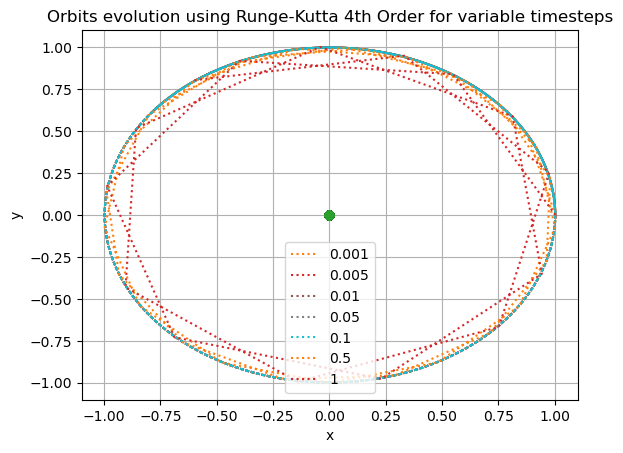

In [49]:
for i in range(len(dt_array)): # calculate and plot orbit for each time step

    r3_rk4_dt = RK4_solver_moon(RHS_Gravitional_Orbit, r3_3b_0, m1_3b, r1_3b_0, m2_3b, r2_3b_0, dt_array[i], Nsteps_array[i])
    plt.plot(r1_3b[:,0], r1_3b[:,1], linestyle = '-', marker='o')
    plt.plot(r3_rk4_dt[:,0], r3_rk4_dt[:,1], label = dt_array[i], linestyle = ':') # label each graph
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Orbits evolution using Runge-Kutta 4th Order for variable timesteps')
    plt.legend();

The results are as expected, with larger timesteps leading to a more inaccurate, unstable orbit. Timesteps equal to or smaller than 0.01 s allow for a reasonably accurate circular orbit. 

# Three-body figure-of-eight choreography 

To explore further, we will now consider systems of more than 3 bodies which no longer have a fixed significantly heavy mass at the centre of the orbit. This will mean for each body, we will have to consider every other body's interaction with it. For an N-body system, we will have to typically consider at least N(N-1) interactions, hence these problems are typically much harder to solve$^{5}$. 
To start, we will first investigate a figure-of-eight choreography consisting of 3 bodies of equal mass. To achieve this, we will be using the initial conditions: 

$$ x_1 = -x_2 = 0.97000436 - 0.24308753i, x_3 = 0, v_3 = -2v_1 = -2v_2 = -0.93240737-0.86473146i $$
$$ m_1 = m_2 = m_3 = 1 $$

which result in the 3 bodies following a figure-of-eight pattern under their own gravity$^{6}$. These conditions were discovered in the paper: A Remarkable Periodic Solution of the Three-Body Problem in the Case of Equal Masses by Alain Chenciner and Richard Montgomery. To propagate the system, we will be using the velocity Verlet method, with the same timesteps and set-up as before. 

In [79]:
%%time
# Initial conditions from above
m = 1 # all bodies have the same mass
r1c0 = np.array([.97000436, -0.24308753])
r2c0 = -r1c0
r3c0 = np.array([0,0])
v3c0 = np.array([-0.93240737, -0.86473146])
v2c0 = v1c0 = -0.5 * v3c0
# Set up number of steps and timestep 
Nstepsc = 15000
Ndimc = 2
dtc = 0.01
# Storage for positions, velocities and energies 
r1c = np.zeros((Nstepsc,Ndimc))
r2c = np.zeros((Nstepsc,Ndimc))
r3c = np.zeros((Nstepsc,Ndimc))
v1c = np.zeros((Nstepsc,Ndimc))
v2c = np.zeros((Nstepsc,Ndimc))
v3c = np.zeros((Nstepsc,Ndimc))
KE1c = np.zeros(Nstepsc)
KE2c = np.zeros(Nstepsc)
KE3c = np.zeros(Nstepsc)
PE1c = np.zeros(Nstepsc)
PE2c = np.zeros(Nstepsc)
PE3c = np.zeros(Nstepsc)
# Store initial conditions as first step
r1c[0], r2c[0], r3c[0] = r1c0, r2c0, r3c0  
v1c[0], v2c[0], v3c[0] = v1c0, v2c0, v3c0
# Intitial energies
KE1c[0] = 0.5 * m * np.linalg.norm(v1c[0]) ** 2
KE2c[0] = 0.5 * m * np.linalg.norm(v2c[0]) ** 2
KE3c[0] = 0.5 * m * np.linalg.norm(v3c[0]) ** 2
PE1c[0] = - m * m / np.linalg.norm(r1c[0]-r2c[0]) - m * m / np.linalg.norm(r1c[0]-r3c[0])  
PE2c[0] = - m * m / np.linalg.norm(r2c[0]-r1c[0]) - m * m / np.linalg.norm(r2c[0]-r3c[0])
PE3c[0] = - m * m / np.linalg.norm(r3c[0]-r2c[0]) - m * m / np.linalg.norm(r3c[0]-r1c[0])

CPU times: total: 0 ns
Wall time: 1 ms


In [80]:
%%time
for i in range(Nstepsc-1): # propagate system using velocity verlet method
    # Find forces on masses at this timestep
    f1c = force(r1c[i], r2c[i], m, m) + force(r1c[i], r3c[i], m, m) # add force from each other body
    f2c = force(r2c[i], r1c[i], m, m) + force(r2c[i], r3c[i], m, m)
    f3c = force(r3c[i], r2c[i], m, m) + force(r3c[i], r1c[i], m, m)
    # Update positions using velocity Verlet
    r1c[i+1] = r1c[i] + dtc * v1c[i] + (dtc**2) * f1c/ (2 * m)
    r2c[i+1] = r2c[i] + dtc * v2c[i] + (dtc**2) * f2c/ (2 * m)
    r3c[i+1] = r3c[i] + dtc * v3c[i] + (dtc**2) * f3c/ (2 * m)
    # Find forces at new timestep 
    f1cnew = force(r1c[i+1], r2c[i+1], m, m) + force(r1c[i+1], r3c[i+1], m, m)
    f2cnew = force(r2c[i+1], r1c[i+1], m, m) + force(r2c[i+1], r3c[i+1], m, m) 
    f3cnew = force(r3c[i+1], r2c[i+1], m, m) + force(r3c[i+1], r1c[i+1], m, m)
    # Update velocities using velocity Verlet
    v1c[i+1] = v1c[i] + (dtc * (f1c + f1cnew) / (2*m))
    v2c[i+1] = v2c[i] + (dtc * (f2c + f2cnew) / (2*m))
    v3c[i+1] = v3c[i] + (dtc * (f3c + f3cnew) / (2*m))
    # Store energies
    KE1c[i+1] = 0.5 * m * np.linalg.norm(v1c[i+1]) ** 2
    KE2c[i+1] = 0.5 * m * np.linalg.norm(v1c[i+1]) ** 2
    KE3c[i+1] = 0.5 * m * np.linalg.norm(v1c[i+1]) ** 2
    PE1c[i+1] = - m * m / np.linalg.norm(r1c[i+1]-r2c[i+1]) - m * m / np.linalg.norm(r1c[i+1]-r3c[i+1])
    PE2c[i+1] = - m * m / np.linalg.norm(r2c[i+1]-r1c[i+1]) - m * m / np.linalg.norm(r2c[i+1]-r3c[i+1])
    PE3c[i+1] = - m * m / np.linalg.norm(r3c[i+1]-r2c[i+1]) - m * m / np.linalg.norm(r3c[i+1]-r1c[i+1])

CPU times: total: 1.97 s
Wall time: 1.95 s


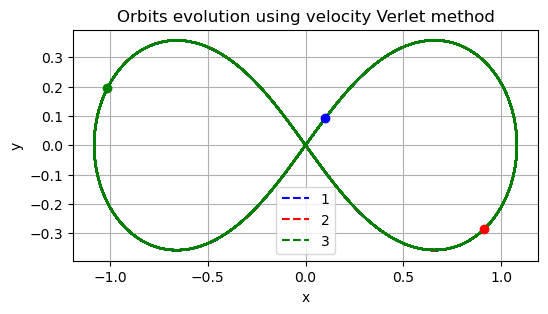

In [81]:
plt.figure(figsize=(6, 3)) # choose lanscape dimensions
plt.plot(r1c[:,0], r1c[:,1], label='1', color = 'blue', linestyle = '--')
plt.plot(r2c[:,0], r2c[:,1], label='2', color = 'red', linestyle = '--')
plt.plot(r3c[:,0], r3c[:,1], label='3', color = 'green', linestyle = '--')
plt.plot(r1c[200,0], r1c[200,1], 'bo') # plot the last position for each orbit to see where they end up
plt.plot(r2c[200,0], r2c[200,1], 'ro')
plt.plot(r3c[200,0], r3c[200,1], 'go')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits evolution using velocity Verlet method')
plt.legend();

From above, we can see that the code and initial conditions were successful in creating a figure-of-eight orbit pattern for the 3 bodies, within a sensible running time as well. However, the overlapping orbits make it difficult to distinguish them from each other so it would be useful to check the orbits at different timesteps with a short trail behind them:  

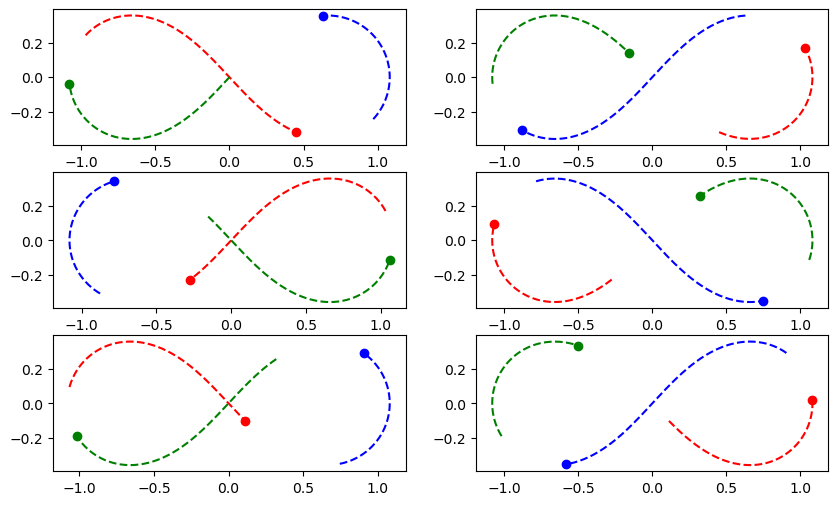

In [82]:
figc = plt.figure(figsize=(10,6)) # dimensions fit to hold 2 by 3 figure-of-eight plots
index = 1 # counter to index subplots
interval = 150 # This allows for short enough paths where we can follow each body from picture to picture easily
for i in range(0,interval * 6, interval): # 6 plots
    ax = figc.add_subplot(3,2,index)
    ax.plot(r1c[i:i+interval,0], r1c[i:i+interval,1], color = 'blue', linestyle = '--')
    ax.plot(r2c[i:i+interval,0], r2c[i:i+interval,1], color = 'red', linestyle = '--')
    ax.plot(r3c[i:i+interval,0], r3c[i:i+interval,1], color = 'green', linestyle = '--')
    ax.plot(r1c[i+interval,0], r1c[i+interval,1], 'bo')
    ax.plot(r2c[i+interval,0], r2c[i+interval,1], 'ro')
    ax.plot(r3c[i+interval,0], r3c[i+interval,1], 'go')
    index += 1 # no need to label graphs as formatting doesn't normally work and we know what the axis are anyway from previosly

From these instances in time, we can see how the orbits propagate throughout time and visualise more easily how they follow each other. Each of the bodies follows the same pattern and we notice how each body becomes faster when they are travelling near the centre as indicated by the longer path travelled, and slower when they are turning a circular path at the sides. We can also analyse their energies and angular momentum using the same methods as before. 

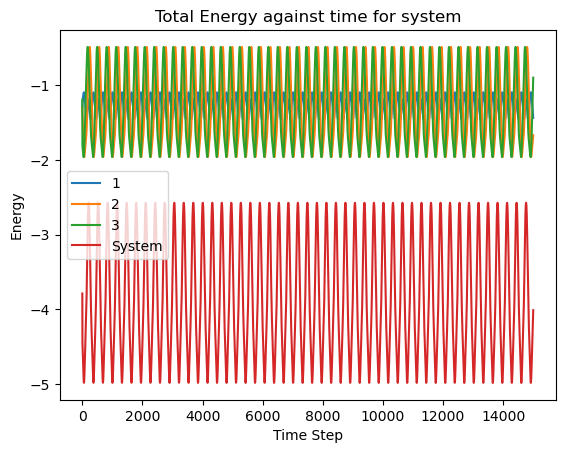

In [83]:
# find total energies
TE1c = KE1c + PE1c
TE2c = KE2c + PE2c
TE3c = KE3c + PE3c
TE_systemc = TE1c + TE2c + TE3c 
# plot energies
plt.plot(TE1c, label = '1')
plt.plot(TE2c, label = '2')
plt.plot(TE3c, label = '3')
plt.plot(TE_systemc, label = 'System')
plt.xlabel('Time Step')
plt.ylabel('Energy')
plt.title('Total Energy against time for system')
plt.legend();

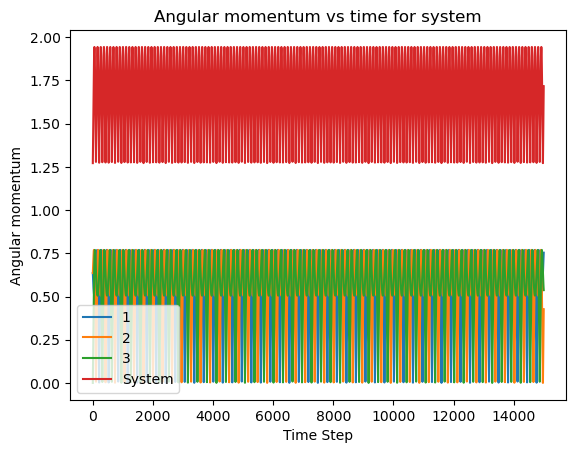

In [84]:
#find angular momentum
Lc1 = m * np.sqrt(v1c[:,0] ** 2 + v1c[:,1] ** 2) * np.sqrt(r1c[:,0] ** 2 + r1c[:,1] ** 2)
Lc2 = m * np.sqrt(v2c[:,0] ** 2 + v2c[:,1] ** 2) * np.sqrt(r2c[:,0] ** 2 + r2c[:,1] ** 2)
Lc3 = m * np.sqrt(v3c[:,0] ** 2 + v3c[:,1] ** 2) * np.sqrt(r3c[:,0] ** 2 + r3c[:,1] ** 2)
Lsystemc = Lc1 + Lc2 + Lc3
# calculate angular momemtum
plt.plot(Lc1, label='1')
plt.plot(Lc2, label='2')
plt.plot(Lc3, label='3')
plt.plot(Lsystemc, label='System')
plt.xlabel('Time Step')
plt.ylabel('Angular momentum')
plt.title("Angular momentum vs time for system")
plt.legend();

It seems that the system was unable to conserve total energy and angular momentum, or at least there is an error in our code that I was unable to find (the latter probably being the most likely). This isn't too big of an issue however as the figure-of-eight orbit was still successful and proved the validity of our initial conditions. 

We can still further investigate the stability of our choreography by making our initial conditions less accurate. The paper gave the initial conditions at 8 s.f. so we can observe how stable our orbits are between 2 and 7 significant figures as below. 

In [50]:
x_pos = [0.9700043, 0.970004, 0.97000, 0.9700, 0.970, 0.97] # create arrays with initial conditions at different accuracies
y_pos = [-0.2430875, -0.243087, -0.24308, -0.2430, -0.243, -0.24]
x_vel = [-0.9324073, -0.932407, -0.93240, -0.9324, -0.932, -0.93]
y_vel = [-0.8647314, -0.864731, -0.86473, -0.8647, -0.864, -0.86]

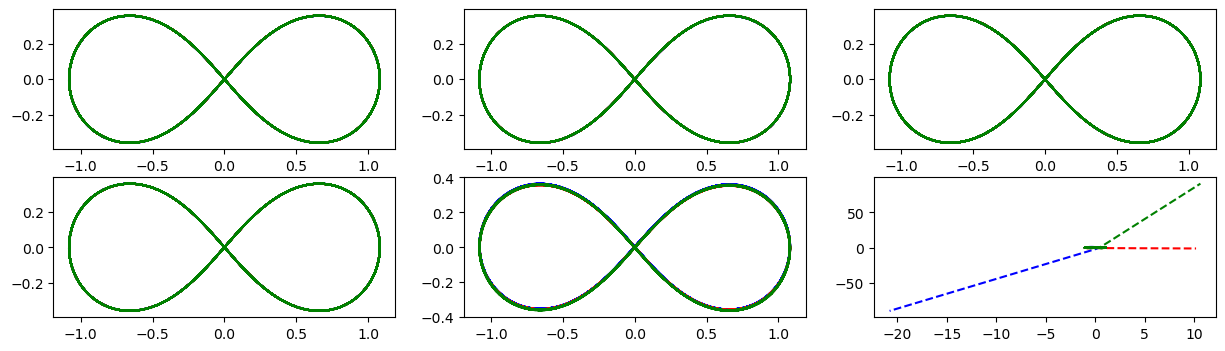

In [114]:
ax = figc.add_subplot(2,4,index) # store plots two by three (for some reason (2,3) doesn't work but (2,4) produces wanted results)
figc = plt.figure(figsize=(15,4)) 
index = 1 # counter to index subplots    
for i in range(len(x_pos)): 
    # Set all storage arrays to zero and adjust initial conditions (code simplified from before to remove calculations for energy)
    m = 1 # all bodies have the same mass
    r1c0 = np.array([x_pos[i], y_pos[i]]) # loop through all initial positions and velocities at different accuracies
    r2c0 = -r1c0
    r3c0 = np.array([0,0])
    v3c0 = np.array([x_vel[i], y_vel[i]])
    v2c0 = v1c0 = -0.5 * v3c0
    # Storage for positions, velocities and energies 
    r1c = np.zeros((Nstepsc,Ndimc))
    r2c = np.zeros((Nstepsc,Ndimc))
    r3c = np.zeros((Nstepsc,Ndimc))
    v1c = np.zeros((Nstepsc,Ndimc))
    v2c = np.zeros((Nstepsc,Ndimc))
    v3c = np.zeros((Nstepsc,Ndimc))
    # Store initial conditions as first step
    r1c[0], r2c[0], r3c[0] = r1c0, r2c0, r3c0  
    v1c[0], v2c[0], v3c[0] = v1c0, v2c0, v3c0
    for i in range(Nstepsc-1): # propagate system using velocity verlet method
        # Find forces on masses at this timestep
        f1c = force(r1c[i], r2c[i], m, m) + force(r1c[i], r3c[i], m, m) # add force from each other body
        f2c = force(r2c[i], r1c[i], m, m) + force(r2c[i], r3c[i], m, m)
        f3c = force(r3c[i], r2c[i], m, m) + force(r3c[i], r1c[i], m, m)
        # Update positions using velocity Verlet
        r1c[i+1] = r1c[i] + dtc * v1c[i] + (dtc**2) * f1c/ (2 * m)
        r2c[i+1] = r2c[i] + dtc * v2c[i] + (dtc**2) * f2c/ (2 * m)
        r3c[i+1] = r3c[i] + dtc * v3c[i] + (dtc**2) * f3c/ (2 * m)
        # Find forces at new timestep 
        f1cnew = force(r1c[i+1], r2c[i+1], m, m) + force(r1c[i+1], r3c[i+1], m, m)
        f2cnew = force(r2c[i+1], r1c[i+1], m, m) + force(r2c[i+1], r3c[i+1], m, m) 
        f3cnew = force(r3c[i+1], r2c[i+1], m, m) + force(r3c[i+1], r1c[i+1], m, m)
        # Update velocities using velocity Verlet
        v1c[i+1] = v1c[i] + (dtc * (f1c + f1cnew) / (2*m))
        v2c[i+1] = v2c[i] + (dtc * (f2c + f2cnew) / (2*m))
        v3c[i+1] = v3c[i] + (dtc * (f3c + f3cnew) / (2*m))
    ax = figc.add_subplot(2,3,index)
    ax.plot(r1c[:,0], r1c[:,1], color = 'blue', linestyle = '--')
    ax.plot(r2c[:,0], r2c[:,1], color = 'red', linestyle = '--')
    ax.plot(r3c[:,0], r3c[:,1], color = 'green', linestyle = '--')
    index += 1 

As we can see, the orbits are all perfectly stable until we reach our last plot with only 2 significant figures. These orbists were only propagated for 15,000 steps so it is likely however that we would see more of the plots losing stability if we had a longer simulation time. 

# Extension of the simple Lagrange problem

In this final section, I will be exploring the Lagrange problem of three bodies with an equal mass being located on the vertices of an equilateral triangle. This problem can also be thought of as three bodies being equally spaced out on a unit circle, with the vertices of the equilateral triangle touching the circle. We will first solve for the initial positions and velocities for the simple Lagrange problem and then extend this to N-bodies equally spaced on a unit circle. The aim is to ensure all the bodies follow each other in a unit circle, orbiting around their centre of mass under their gravity, through the correct initial positions and velocities, and then use the velocity Verlet method to propagate the system.

To make our problem simpler, we will always keep one body at the bottom of the circle, specifically (0,-1). This body will act as our 'anchor' and reference point. We will then consider $\theta$ as the angle between our anchor point and another body through the centre of the circle in an anticlockwise direction. For example, the point (0,1) will be located at $\pi / 2$ radians (on the unit circle). This coordinate is the same as (sin(0), cos ($\pi$)). We can then consider the relationship between the trigonometric equations and the unit circle and point out that sin($\theta$) gives our x-coordinate and cos($\pi$ - $\theta$) gives our y-coordinate. 

For the simple Lagrange problem, we can use trigonometric equations to find the initial positions. Our first coordinate will always be (sin(0), cos ($\pi$)) as mentioned above. Since we have three bodies that are equally distant from each other, the angles between them will be $2\pi/3$. So the other two bodies will start where $\theta$ = $2\pi/3$ and $\theta$ = $4\pi/3$, thereforce their initial coordinates will be at (sin($2\pi/3$), cos ($\pi/3$)) and (sin($4\pi/3$), cos($-\pi/3$)). We will plot these points as well as a trace out of a unit circle to confirm they lie on it.   

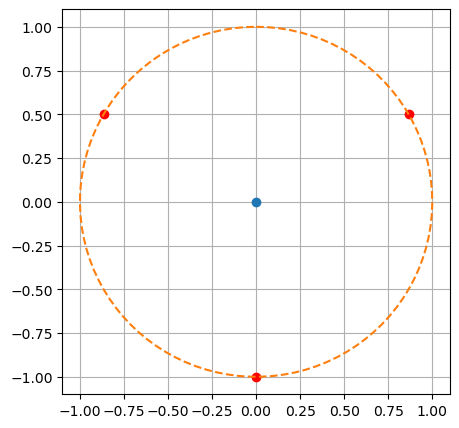

In [117]:
rc1_0 = np.array([np.sin(0),np.cos(np.pi)]) # create initial conditions
rc2_0 = np.array([np.sin(2 * np.pi / 3),np.cos(np.pi / 3)])
rc3_0 = np.array([np.sin(4 * np.pi / 3),np.cos(-np.pi / 3)])
sin = np.sin(np.linspace(0, 2 * np.pi, 100)) # draw circle using relationship between trigonometry and the unit circle
cos = np.cos(np.linspace(0, 2 * np.pi, 100))
plt.figure(figsize=(5, 5))
plt.plot(0,0, 'o')
plt.plot(rc1_0[0], rc1_0[1], 'ro')
plt.plot(rc2_0[0], rc2_0[1], 'ro')
plt.plot(rc3_0[0], rc3_0[1], 'ro')
plt.plot(sin, cos, linestyle = '--')
plt.grid(True);

As we can see above, the points lie on the unit circle and also look like they are equally spaced apart. To find their initial velocities in a simple way, we will have to consider equations (2) and (3) and equate them, putting (3) on the left-hand side (LHS) and changing the vector into a unit vector:
$$  \frac{m_1 v_1^2}{r} = \frac{G m_1 m_2}{|r_{12}^{2}|} \hat{r_{12}} + \frac{G m_1 m_3}{|r_{13}^{2}|} \hat{r_{13}} $$
Focusing on the body at the bottom of the circle, we want it to orbit a circle of radius one, so r will be equal to 1. The right-hand side (RHS) should only consider components of the force which are parallel to the line connecting the bottom body to the centre (upwards or north) as these are the only components which contribute to the centripetal force. Using simple geometry and trigonometry, our unit vectors are:

$$ \hat{r_{12}} = sin(\pi/3), \quad \hat{r_{13}} = sin(2\pi/3) $$

Using the cosine rule, we can also calculate $|r_{12}^{2}|$ and $|r_{13}^{2}|$:


$$ |r_{12}^{2}| = r^2 + r^2 - 2cos(2\pi/3) = 2 - 2cos(2\pi/3), \qquad |r_{13}^{2}| = 2 - 2cos(4\pi/3). $$

Since $G$ and all our masses are equal to 1, we end up with:

$$ |v| = \sqrt{ \frac{sin(\pi/3)}{2 - 2cos(2\pi/3)} + \frac{sin(2\pi/3)}{2 - 2cos(4\pi/3)} }. $$

Due to the polar symmetry of the problem, this means all bodies will have the same magnitude of velocity as above.  

The direction of our velocities will be tangent in an anticlockwise direction. In our model, this means a rotation of $\pi/2$ radians anticlockwise of the position vector, which is a transformation of the coordinates from $(x_0, y_0)$ to $(-y_0, x_0)$. 

In [122]:
v = np.sqrt( 1 / np.sqrt(3) )  
vc1_0 = np.array([-rc1_0[1], rc1_0[0]]) * v # transformation to make directions tangent to position 
vc2_0 = np.array([-rc2_0[1], rc2_0[0]]) * v
vc3_0 = np.array([-rc3_0[1], rc3_0[0]]) * v

In [146]:
# Set up for 3 bodies 
Nstepsc = 7000
dtc = 0.01
Ndim = 2
# storage for positions and velocities
rc1 = np.zeros((Nstepsc,Ndim))
rc2 = np.zeros((Nstepsc,Ndim))
rc3 = np.zeros((Nstepsc,Ndim))
vc1 = np.zeros((Nstepsc,Ndim))
vc2 = np.zeros((Nstepsc,Ndim))
vc3 = np.zeros((Nstepsc,Ndim))
# Initial conditions
rc1[0], rc2[0], rc3[0] = rc1_0, rc2_0, rc3_0 
vc1[0], vc2[0], vc3[0] = vc1_0, vc2_0, vc3_0

In [147]:
%%time 
for i in range(Nstepsc-1):
    # Find forces on masses at this timestep
    fc1 = force(rc1[i], rc2[i], m, m) + force(rc1[i], rc3[i], m, m) # add forces on one body from each body
    fc2 = force(rc2[i], rc1[i], m, m) + force(rc2[i], rc3[i], m, m)
    fc3 = force(rc3[i], rc2[i], m, m) + force(rc3[i], rc1[i], m, m) 
    # Update positions using velocity Verlet
    rc1[i+1] = rc1[i] + dtc * vc1[i] + (dtc**2) * fc1/ (2 * m)
    rc2[i+1] = rc2[i] + dtc * vc2[i] + (dtc**2) * fc2/ (2 * m)
    rc3[i+1] = rc3[i] + dtc * vc3[i] + (dtc**2) * fc3/ (2 * m)
    # Find forces at new timestep 
    f1new = force(rc1[i+1], rc2[i+1], m, m) + force(rc1[i+1], rc3[i+1], m, m)
    f2new = force(rc2[i+1], rc1[i+1], m, m) + force(rc2[i+1], rc3[i+1], m, m)
    f3new = force(rc3[i+1], rc2[i+1], m, m) + force(rc3[i+1], rc1[i+1], m, m)
    # Update velocities using velocity Verlet
    vc1[i+1] = vc1[i] + (dtc * (fc1 + f1new) / (2*m))
    vc2[i+1] = vc2[i] + (dtc * (fc2 + f2new) / (2*m))
    vc3[i+1] = vc3[i] + (dtc * (fc3 + f3new) / (2*m))

CPU times: total: 609 ms
Wall time: 1.28 s


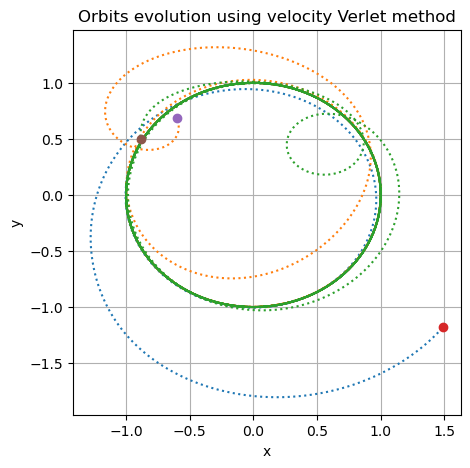

In [148]:
plt.figure(figsize=(5, 5))
plt.plot(rc1[:,0], rc1[:,1], linestyle = ':')
plt.plot(rc2[:,0], rc2[:,1], linestyle = ':')
plt.plot(rc3[:,0], rc3[:,1], linestyle = ':')
plt.plot(rc1[-1][0], rc1[-1][1], 'o')
plt.plot(rc2[-1][0], rc2[-1][1], 'o')
plt.plot(rc3[-1][0], rc3[-1][1], 'o')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits evolution using velocity Verlet method');

We can see the orbits are stable and were able to execute in a reasonable amount of time of under 1s. Once again, it would be easier to plot these in timesteps with a short trial behind them. 

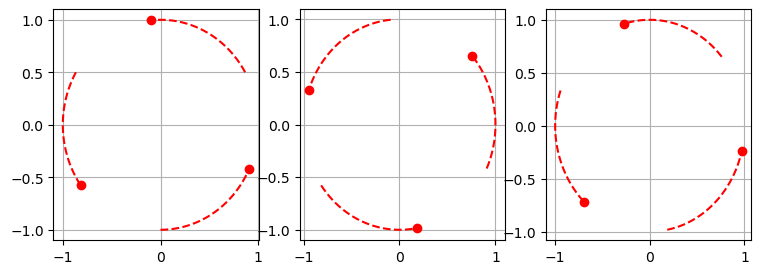

In [56]:
figc = plt.figure(figsize=(9,3)) # dimensions suitable to hold 3 sub plots
index = 1
interval = 150 # short enough path to see 
for i in range(0,interval * 3 , interval): # add 3 subplots
    ax = figc.add_subplot(1,3,index)
    ax.plot(rc1[i:i+interval,0], rc1[i:i+interval,1], color = 'red', linestyle = '--')
    ax.plot(rc2[i:i+interval,0], rc2[i:i+interval,1], color = 'red', linestyle = '--')
    ax.plot(rc3[i:i+interval,0], rc3[i:i+interval,1], color = 'red', linestyle = '--')
    ax.plot(rc1[i+interval,0], rc1[i+interval,1], 'ro')
    ax.plot(rc2[i+interval,0], rc2[i+interval,1], 'ro')
    ax.plot(rc3[i+interval,0], rc3[i+interval,1], 'ro')
    index += 1
    plt.grid(True)

Once again, these instances in time allow us to verify again that the orbits follow each other along the circumference of the unit circle, with good stability. We will now repeat the above analyses except with 5 bodies. Since they're evenly spaced out, they have an angle of $2\pi/5$ between them. Using the same method as before, we find our initial positions to be (sin(0), cos($\pi$), (sin($2\pi/5$), cos($3\pi/5$)), (sin($4\pi/5$), cos($\pi/5$)), (sin($6\pi/5$), cos($-\pi/5$)), (sin($8\pi/5$), cos($-3\pi/5$)). 

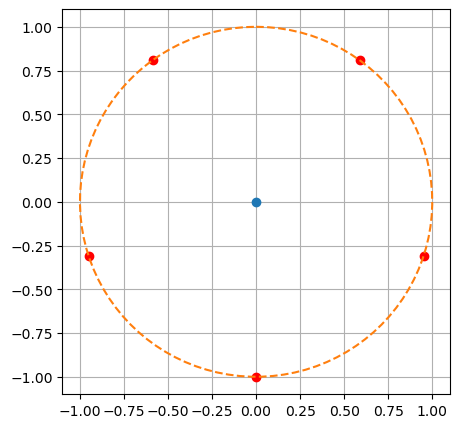

In [57]:
rc1_0 = np.array([np.sin(0),np.cos(np.pi)]) # initialise positions
rc2_0 = np.array([np.sin(2 * np.pi / 5),np.cos(3 * np.pi / 5 )])
rc3_0 = np.array([np.sin(4 * np.pi / 5),np.cos(np.pi / 5 )])
rc4_0 = np.array([np.sin(6 * np.pi / 5),np.cos(-np.pi / 5 )])
rc5_0 = np.array([np.sin(8 * np.pi / 5),np.cos(-3 *np.pi / 5 )])

sin = np.sin(np.linspace(0, 2 * np.pi, 100))
cos = np.cos(np.linspace(0, 2 * np.pi, 100))
plt.figure(figsize=(5, 5))
plt.plot(0,0, 'o')
plt.plot(rc1_0[0], rc1_0[1], 'ro')
plt.plot(rc2_0[0], rc2_0[1], 'ro')
plt.plot(rc3_0[0], rc3_0[1], 'ro')
plt.plot(rc4_0[0], rc4_0[1], 'ro')
plt.plot(rc5_0[0], rc5_0[1], 'ro')
plt.plot(sin, cos, linestyle = '--')
plt.grid(True);

Force on one body due to all other bodies is given by: 

$$  \frac{m_1 v_1^2}{r} = \frac{G m_1 m_2}{|r_{12}^{2}|} \hat{r_{12}} + \frac{G m_1 m_3}{|r_{13}^{2}|} \hat{r_{13}} + \frac{G m_1 m_3}{|r_{14}^{2}|} \hat{r_{14}} + \frac{G m_1 m_5}{|r_{15}^{2}|} \hat{r_{15}}. $$

Using geometry, the distances between the bodies are given by:

$$ |r_{12}^{2}| = 2 - 2cos(2\pi/5), \quad |r_{13}^{2}| = 2 - 2cos(4\pi/5),\quad |r_{14}^{2}| = 2 - 2cos(6\pi/5),\quad|r_{15}^{2}| = 2 - 2cos(8\pi/5) $$

and using trigonometry, the unit vectors are: 

$$ \hat{r_{12}} = sin(\pi/5), \quad \hat{r_{13}} = sin(2\pi/5), \quad \hat{r_{14}} = sin(3\pi/5), \quad \hat{r_{15}} = sin(4\pi/5). $$


Due to $G$ and all masses being equal to one, magnitude of velocity for all bodies to stay in orbit is therefore:

$$ |v| = \sqrt{ \frac{sin(\pi/5)}{2 - 2cos(2\pi/5)} + \frac{sin(2\pi/5)}{2 - 2cos(4\pi/5)} + \frac{sin(3\pi/5)}{2 - 2cos(6\pi/5)} + \frac{sin(4\pi/5)}{2 - 2cos(8\pi/5)}}  . $$

In [60]:
v = np.sqrt( np.sin(np.pi / 5) / (1-np.cos(2 * np.pi / 5)) + np.sin(2 * np.pi / 5) / (1 - np.cos(4 * np.pi / 5)) )  
vc1_0 = np.array([-rc1_0[1], rc1_0[0]]) * v # transformation to make directions tangent to position
vc2_0 = np.array([-rc2_0[1], rc2_0[0]]) * v
vc3_0 = np.array([-rc3_0[1], rc3_0[0]]) * v
vc4_0 = np.array([-rc4_0[1], rc4_0[0]]) * v
vc5_0 = np.array([-rc5_0[1], rc5_0[0]]) * v
# Set paramters
Nstepsc = 1000
dtc = 0.01
Ndim = 2
# storage for positions and velocities
rc1 = np.zeros((Nstepsc,Ndim))
rc2 = np.zeros((Nstepsc,Ndim))
rc3 = np.zeros((Nstepsc,Ndim))
rc4 = np.zeros((Nstepsc,Ndim))
rc5 = np.zeros((Nstepsc,Ndim))
vc1 = np.zeros((Nstepsc,Ndim))
vc2 = np.zeros((Nstepsc,Ndim))
vc3 = np.zeros((Nstepsc,Ndim))
vc4 = np.zeros((Nstepsc,Ndim))
vc5 = np.zeros((Nstepsc,Ndim))
# Initial conditions
rc1[0], rc2[0], rc3[0], rc4[0], rc5[0] = rc1_0, rc2_0, rc3_0, rc4_0, rc5_0 
vc1[0], vc2[0], vc3[0], vc4[0], vc5[0] = vc1_0, vc2_0, vc3_0, vc4_0, vc5_0

In [61]:
%%time
for i in range(Nstepsc-1):
    # Find forces on masses at this timestep
    fc1 = force(rc1[i], rc2[i], m, m) + force(rc1[i], rc3[i], m, m) + force(rc1[i], rc4[i], m, m) + force(rc1[i], rc5[i], m, m)
    fc2 = force(rc2[i], rc1[i], m, m) + force(rc2[i], rc3[i], m, m) + force(rc2[i], rc4[i], m, m) + force(rc2[i], rc5[i], m, m)
    fc3 = force(rc3[i], rc1[i], m, m) + force(rc3[i], rc2[i], m, m) + force(rc3[i], rc4[i], m, m) + force(rc3[i], rc5[i], m, m) 
    fc4 = force(rc4[i], rc1[i], m, m) + force(rc4[i], rc2[i], m, m) + force(rc4[i], rc3[i], m, m) + force(rc4[i], rc5[i], m, m) 
    fc5 = force(rc5[i], rc1[i], m, m) + force(rc5[i], rc2[i], m, m) + force(rc5[i], rc3[i], m, m) + force(rc5[i], rc4[i], m, m) 
    # Update positions using velocity Verlet
    rc1[i+1] = rc1[i] + dtc * vc1[i] + (dtc**2) * fc1/ (2 * m)
    rc2[i+1] = rc2[i] + dtc * vc2[i] + (dtc**2) * fc2/ (2 * m)
    rc3[i+1] = rc3[i] + dtc * vc3[i] + (dtc**2) * fc3/ (2 * m)
    rc4[i+1] = rc4[i] + dtc * vc4[i] + (dtc**2) * fc4/ (2 * m)
    rc5[i+1] = rc5[i] + dtc * vc5[i] + (dtc**2) * fc5/ (2 * m)
    # Find forces at new timestep 
    f1new = force(rc1[i+1], rc2[i+1], m, m) + force(rc1[i+1], rc3[i+1], m, m) + force(rc1[i+1], rc4[i+1], m, m) + force(rc1[i+1], rc5[i+1], m, m)
    f2new = force(rc2[i+1], rc1[i+1], m, m) + force(rc2[i+1], rc3[i+1], m, m) + force(rc2[i+1], rc4[i+1], m, m) + force(rc2[i+1], rc5[i+1], m, m)
    f3new = force(rc3[i+1], rc1[i+1], m, m) + force(rc3[i+1], rc2[i+1], m, m) + force(rc3[i+1], rc4[i+1], m, m) + force(rc3[i+1], rc5[i+1], m, m) 
    f4new = force(rc4[i+1], rc1[i+1], m, m) + force(rc4[i+1], rc2[i+1], m, m) + force(rc4[i+1], rc3[i+1], m, m) + force(rc4[i+1], rc5[i+1], m, m) 
    f5new = force(rc5[i+1], rc1[i+1], m, m) + force(rc5[i+1], rc2[i+1], m, m) + force(rc5[i+1], rc3[i+1], m, m) + force(rc5[i+1], rc4[i+1], m, m)
    # Update velocities using velocity Verlet
    vc1[i+1] = vc1[i] + (dtc * (fc1 + f1new) / (2*m))
    vc2[i+1] = vc2[i] + (dtc * (fc2 + f2new) / (2*m))
    vc3[i+1] = vc3[i] + (dtc * (fc3 + f3new) / (2*m))
    vc4[i+1] = vc4[i] + (dtc * (fc4 + f4new) / (2*m))
    vc5[i+1] = vc5[i] + (dtc * (fc5 + f5new) / (2*m))

CPU times: total: 312 ms
Wall time: 293 ms


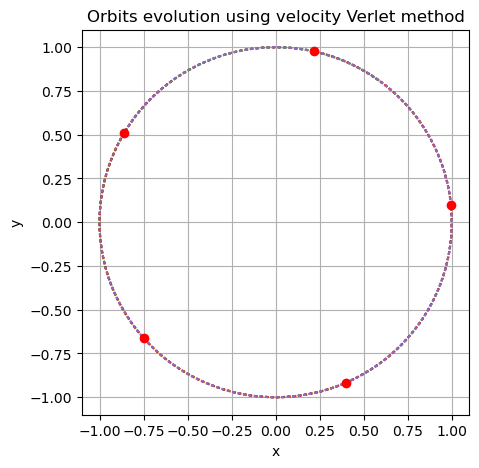

In [62]:
plt.figure(figsize=(5, 5))
plt.plot(rc1[:,0], rc1[:,1], linestyle = ':')
plt.plot(rc2[:,0], rc2[:,1], linestyle = ':')
plt.plot(rc3[:,0], rc3[:,1], linestyle = ':')
plt.plot(rc4[:,0], rc4[:,1], linestyle = ':')
plt.plot(rc5[:,0], rc5[:,1], linestyle = ':')
plt.plot(rc1[-1][0], rc1[-1][1], 'ro')
plt.plot(rc2[-1][0], rc2[-1][1], 'ro')
plt.plot(rc3[-1][0], rc3[-1][1], 'ro')
plt.plot(rc4[-1][0], rc4[-1][1], 'ro')
plt.plot(rc5[-1][0], rc5[-1][1], 'ro')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits evolution using velocity Verlet method');

As we can see from above, the bodies were able to undergo an accurate stable circular orbit within a reasonable execution time of under 1s. Let's plot some graphs of the orbits at different points in time to see their path clearer:

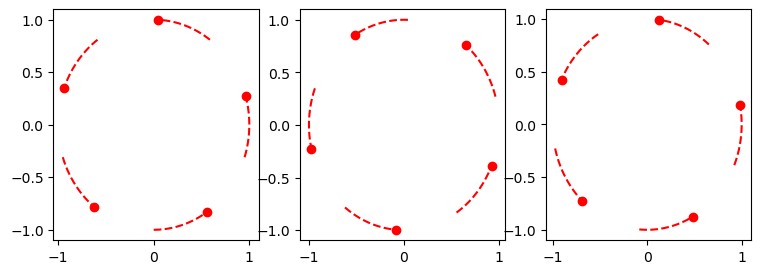

In [63]:
figc = plt.figure(figsize=(9,3))
index = 1
interval = 50 # short enough path to see 
for i in range(0,interval * 3 , interval):
    ax = figc.add_subplot(1,3,index)
    ax.plot(rc1[i:i+interval,0], rc1[i:i+interval,1], color = 'red', linestyle = '--')
    ax.plot(rc2[i:i+interval,0], rc2[i:i+interval,1], color = 'red', linestyle = '--')
    ax.plot(rc3[i:i+interval,0], rc3[i:i+interval,1], color = 'red', linestyle = '--')
    ax.plot(rc4[i:i+interval,0], rc4[i:i+interval,1], color = 'red', linestyle = '--')
    ax.plot(rc5[i:i+interval,0], rc5[i:i+interval,1], color = 'red', linestyle = '--')
    ax.plot(rc1[i+interval,0], rc1[i+interval,1], 'ro')
    ax.plot(rc2[i+interval,0], rc2[i+interval,1], 'ro')
    ax.plot(rc3[i+interval,0], rc3[i+interval,1], 'ro')
    ax.plot(rc4[i+interval,0], rc4[i+interval,1], 'ro')
    ax.plot(rc5[i+interval,0], rc5[i+interval,1], 'ro')
    index += 1

Looking at our code for three and five-body simulations, we notice each time we add more bodies, it becomes exponentially longer. It's quite tedious for us to go through this process again for a larger number of bodies, so it would be convenient if we could spot a pattern in our code and diagrams to see if we could simplify our code. Fortunately, there are some which when looking at our previous examples we can observe. To start, we notice that our initial positions take the form:

$$ r = (sin(i * 2\pi / n), cos( \pi - i * 2\pi / n)  $$

where $n$ is the number of bodies and $i$ is an integer running from 0 to $n-1$. Hence we can modify our code to plot the starting positions as below: 

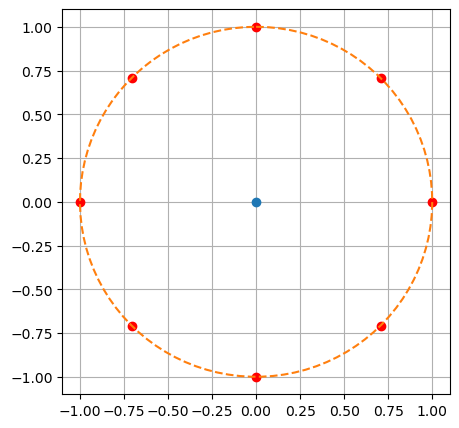

In [64]:
n_circles = 8 # number of bodies 
rc_0 = np.zeros((n_circles, Ndim)) # 2D array to store initial 2D positions for all bodies
for i in range(n_circles): # store initial positions for each body using above formula, iterating over i as mentioned above
    rc_0[i] = [np.sin(2 * np.pi * i / n_circles), np.cos( (np.pi - 2 * np.pi * i / n_circles))]
plt.figure(figsize=(5, 5)) 
plt.plot(0,0, 'o')
for r in rc_0:
    plt.plot(r[0], r[1], 'ro') # plot each bodies initial position
sin = np.sin(np.linspace(0, 2 * np.pi, 100))
cos = np.cos(np.linspace(0, 2 * np.pi, 100))
plt.plot(sin, cos, linestyle = '--')
plt.grid(True);

Looking above, our simplified code was successful in creating the initial plot we wanted, with our bodies being evenly spaced as requested. Furthermore, our code is adaptable and works for any number of bodies. 

We can also figure out a pattern for initial velocity. When looking at the formula for the magnitude of our velocity for 3 bodies and 5 bodies, we notice that it takes the form:
$$v_n = \sqrt{\sum_{i=1}^{n-1} \frac{sin(i*\pi/n)}{2 - 2cos(i*2\pi/n)}}$$
where $n$ is once again the number of bodies. We can code this and propagate our system below, simplifying our code:

In [65]:
vc_0 = np.zeros((n_circles, Ndim)) # storage for initial velocities
for i in range(n_circles): # Set array with velocity unit vectors using the rotation transformation used before
    vc_0[i] = [-rc_0[i][1], rc_0[i][0]]
# Find the magnitude of velocity using the above formula, using a for loop to iterate with i
v_mag = np.sqrt(np.sum([(np.sin(np.pi*i/n_circles)/(2-2*np.cos(2*np.pi*i/n_circles))) for i in range(1, n_circles)]))
vc_0 *= v_mag # multiply velocity unit vectors with the magnitude above
# Set up for 3 bodies 
Nstepsc = 1000
dtc = 0.01
Ndim = 2
# storage for positions and velocities
rc = np.zeros((n_circles, Nstepsc,Ndim)) # create 3D arrays, similiar to previous position storage arrays but for each body
vc = np.zeros((n_circles, Nstepsc,Ndim)) # do same for velocities
# Initial conditions
for i in range(n_circles):
    rc[i][0] = rc_0[i] # set first elements to the initial conditions
    vc[i][0] = vc_0[i]

In [66]:
%%time
for i in range(Nstepsc-1): # iterate through each timestep using velocity verlet method
    fc, fnew = np.zeros((n_circles, Ndim)), np.zeros((n_circles, Ndim))  # storage arrays for forces for each body
    for j in range(n_circles): # iterate through each body to find force on the body
        for k in range(n_circles): # iterate through every other body
            if k != j:
                fc[j] += force(rc[j][i], rc[k][i], m, m) # for each body consider interaction with every other body except self
    for j in range(n_circles):
        rc[j][i+1] = rc[j][i] + dtc * vc[j][i] + (dtc**2) * fc[j] / (2 * m)  # update position for each body
    for j in range(n_circles):
        for k in range(n_circles):
            if k != j:
                fnew[j] += force(rc[j][i+1], rc[k][i+1], m, m) # find new force for each body
    for j in range(n_circles):
        vc[j][i+1] = vc[j][i] + (dtc * (fc[j] + fnew[j]) / (2*m)) # update velocity for each body 

CPU times: total: 781 ms
Wall time: 780 ms


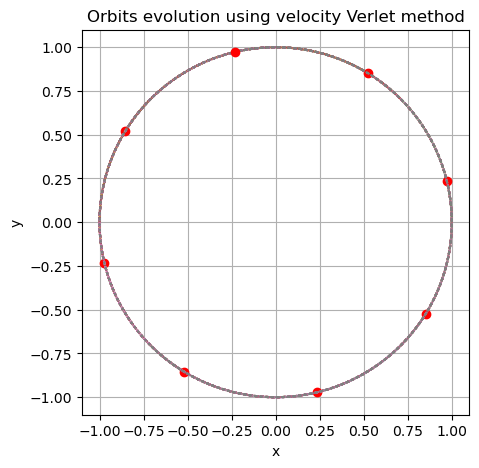

In [67]:
plt.figure(figsize=(5, 5))
for i in range(n_circles): # iterate through all bodies and plot trajectories 
    plt.plot(rc[i][:,0], rc[i][:,1], linestyle = ':')
    plt.plot(rc[i][-1][0], rc[i][-1][1], 'ro')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits evolution using velocity Verlet method')
plt.grid(True);

As we can see from above, our simplified code was able to create a stable circular orbit for 8 evenly spaced bodies in under 1 second. Since our code is adaptable, it's possible to create a function that is able to take in N, dt and number of timesteps and plot a graph of a stable circular orbit for N bodies being evenly spaced on a unit circle. We will try to attempt that below:   

In [70]:
def N_Body(n_circles, dtc, Nstepsc, multiplier):
    '''
    Plots a graph of n_circle bodies orbiting along a unit circle under their own gravity. 
    Inputs: n_circles - number of bodies, dtc - timestep, Nstepsc - number of steps, multiplier - multiplier to adjust
    velocities
    Outputs: None - plots graph which can't be assigned to a variable
    '''
    m = 1 # set initial variables and parameters
    Ndim = 2
    rc_0 = np.zeros((n_circles, Ndim)) # storage for initial positions
    for i in range(n_circles): # calculate and store initial velocities for each body
        rc_0[i] = [np.sin(2 * np.pi * i / n_circles), np.cos((np.pi - 2 * np.pi * i / n_circles))] 
    vc_0 = np.zeros((n_circles, Ndim)) # storage for initial velocities
    for i in range(n_circles): # store unit vectors for initial velocities using pi/2 anticlockwise rotation transformation 
        vc_0[i] = [-rc_0[i][1], rc_0[i][0]]
    v_mag = np.sqrt(np.sum([(np.sin(np.pi*i/n_circles)/(2-2*np.cos(2*np.pi*i/n_circles))) for i in range(1, n_circles)]))
    vc_0 *= v_mag * multiplier # mutiply unit vectors with magnitude
    # storage for positions and velocities for all bodies 
    rc = np.zeros((n_circles, Nstepsc,Ndim)) 
    vc = np.zeros((n_circles, Nstepsc,Ndim))
    # Initial conditions for all bodies
    for i in range(n_circles):
        rc[i][0] = rc_0[i]
        vc[i][0] = vc_0[i]
    for i in range(Nstepsc-1): # use velocity verlet method for each step
        fc, fnew = np.zeros((n_circles, Ndim)), np.zeros((n_circles, Ndim)) # storage for forces
        for j in range(n_circles):
            for k in range(n_circles):
                if k != j: # find force on each body except itself
                    fc[j] += force(rc[j][i], rc[k][i], m, m)
        for j in range(n_circles): # update positions for each body
            rc[j][i+1] = rc[j][i] + dtc * vc[j][i] + (dtc**2) * fc[j] / (2 * m)  
        for j in range(n_circles): # find new force on each body except itself
            for k in range(n_circles):
                if k != j:
                    fnew[j] += force(rc[j][i+1], rc[k][i+1], m, m)
        for j in range(n_circles): # update velocity for each body
            vc[j][i+1] = vc[j][i] + (dtc * (fc[j] + fnew[j]) / (2*m))
    plt.figure(figsize=(5, 5)) 
    for i in range(n_circles): # plot path for each body
        plt.plot(rc[i][:,0], rc[i][:,1], linestyle = ':')
        plt.plot(rc[i][-1][0], rc[i][-1][1], 'ro')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Orbits evolution using velocity Verlet method')
    plt.grid(True);

This is quite a lengthy but powerful function as it allows us to plot any number of bodies in a circle. We can use it to test out how well the velocity Verlet method works for a large number of bodies, specifically for 10, 20 and 50 bodies under different timesteps of 0.01s, 0.0025s, and 0.001s with constant total simulation time (10s). We will first test using the same timestep as we have previously been using of 0.01s: 

CPU times: total: 1.22 s
Wall time: 1.2 s


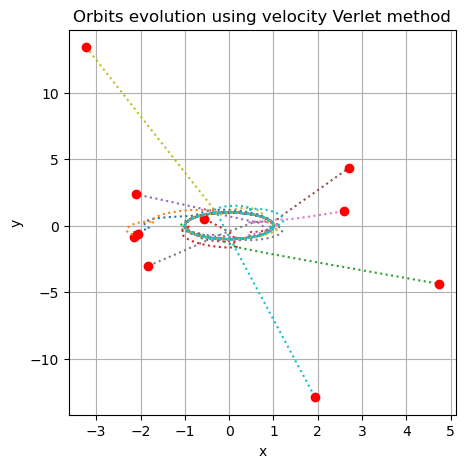

In [71]:
%%time
N_Body(10, 0.01, 1000, 1) # test for 10 bodies 

CPU times: total: 32.8 s
Wall time: 33.2 s


<Figure size 500x500 with 0 Axes>

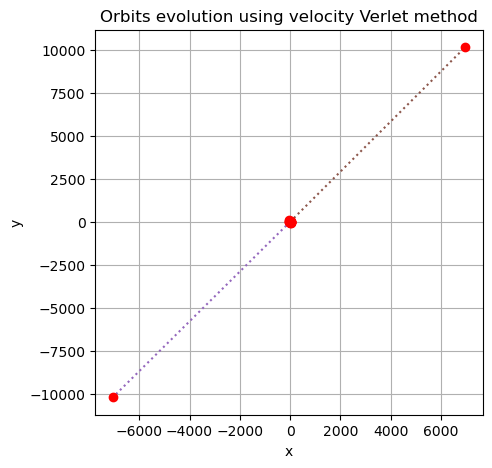

<Figure size 500x500 with 0 Axes>

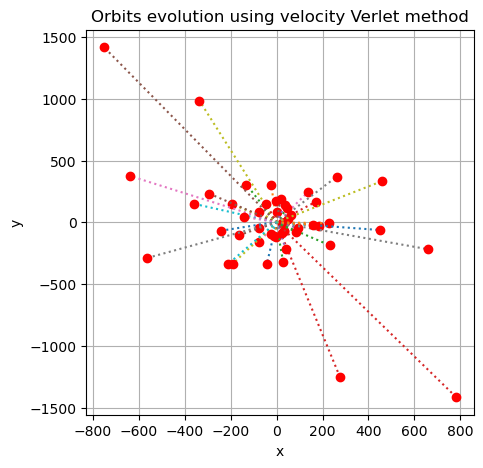

In [72]:
%%time
for num in [20, 50]: # test for 20 and 50 bodies
    plt.figure(figsize=(5, 5))
    N_Body(num, 0.01, 1000, 1);

CPU times: total: 2min 20s
Wall time: 2min 22s


<Figure size 500x500 with 0 Axes>

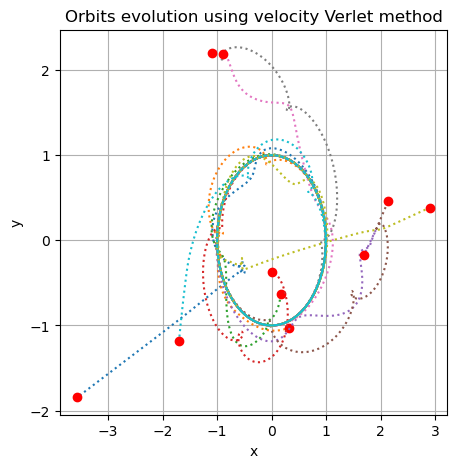

<Figure size 500x500 with 0 Axes>

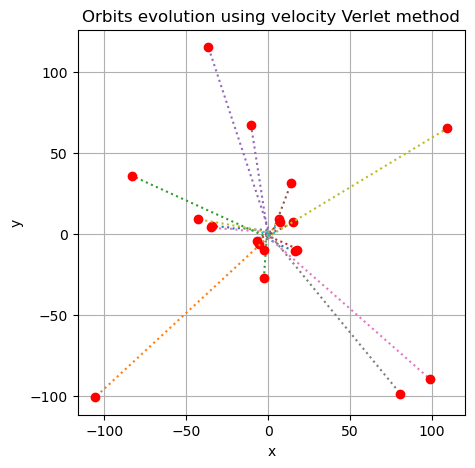

<Figure size 500x500 with 0 Axes>

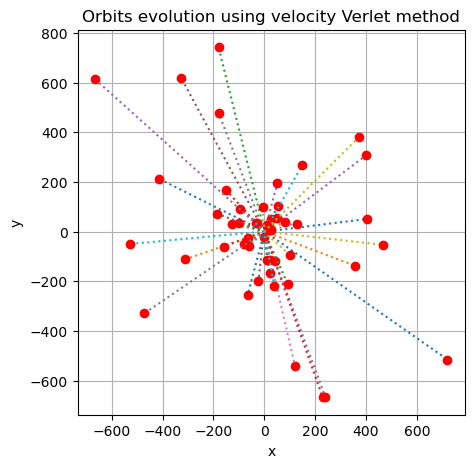

In [73]:
%%time
for num in [10, 20, 50]:
    plt.figure(figsize=(5, 5))
    N_Body(num, 0.0025, 4000, 1);

CPU times: total: 5min 47s
Wall time: 5min 51s


<Figure size 500x500 with 0 Axes>

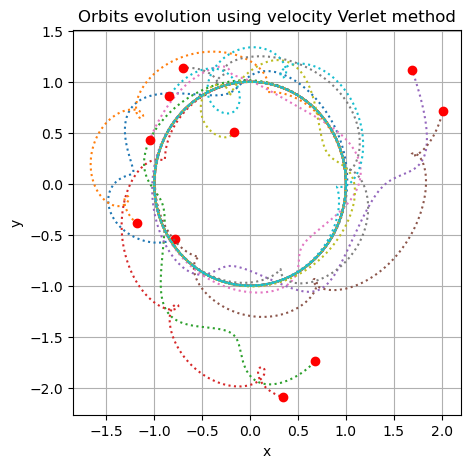

<Figure size 500x500 with 0 Axes>

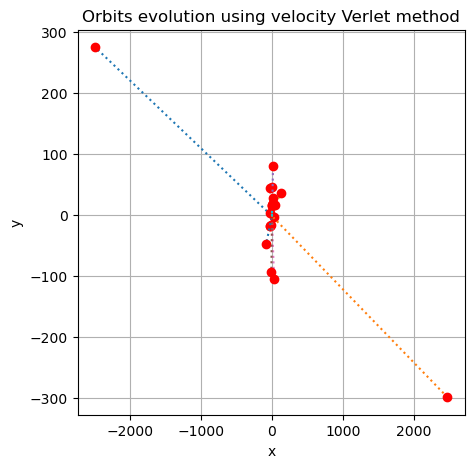

<Figure size 500x500 with 0 Axes>

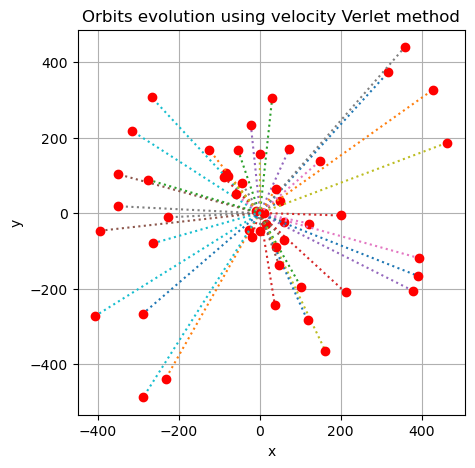

In [74]:
%%time
for num in [10, 20, 50]:
    plt.figure(figsize=(5, 5))
    N_Body(num, 0.001, 10000, 1);

# Conclusion

The Euler method is a simple and easy method to use to simulate multiple-body problems, but lacks a lot of accuracy, unlike the velocity Verlet and fourth-order Runge-Kutta methods which are much more accurate and able to execute in under 1s. While the Runge-Kutta allows for a greater degree of accuracy, the velocity Verlet method is energy-conserving and time-reversible, hence we choose to use it in our analysis for more complex orbits. 

When using the velocity Verlet method to create a choreography with three bodies, it does a great job of producing a stable orbit when provided with the correct initial conditions. When simulating multiple equally spaced bodies travelling along the circumference of a unit circle, it succeeds for a small number of bodies. When the number of bodies is 10 or higher, however, the velocity Verlet method fails to keep a stable orbit when keeping a constant time. This is likely due to the much larger number of interacting forces present, hence any error is magnified much more. The execution time also increases significantly, taking between 1 to 30 seconds when $dt$ = 0.01s, and longer for a smaller $dt$. For each block, the execution of 50 bodies takes significantly longer than the others, hence we we can assume each printed execution time is for 50 bodies. 

[1], [3], [4] David Bowler. PHAS0030: Computational Physics Mini-project briefing: complex orbital dynamics. Department of Physics and Astronomy, University College London, Jan. 2024 

[2] Mario Campanelli. Classical Mechanics A Professor-Student Collaboration. Department of Physics and Astronomy, University
College London, Mar. 2020.

[5] Richard Montgomery. The Three-Body Problem. The Scientific American, Aug. 2019. 

[6] Alain Chenciner and Richard Montgomery. A remarkable periodic solution of the three-body problem in the case of equal masses. Annals of Mathematics, 152(3):881–901, 2000.